# Business Understanding

## Problem Statement
The large increase in shipping demand has not been matched by an increase in the capabilities of logistics companies.<br>
Delayed delivery can be a risk in many sectors, one of which is retail sales in e-commerce, late delivery will cause the product supply chain to be hampered and reduce the credibility of the retailer. Apart from that, delays by the expedition will also cause buyer disappointment which of course can be detrimental to the retailer.

## Goal
Building a **binary classification** machine learning model that can **predict delays** in logistics/product delivery in e-commerce with **high accuracy**

## Objectives
1. Analyze the data and determine the target feature/binary label (is_late -> (1 or 0), according to the problem statement (delay in delivery)
2. Carry out data processing, to produce data that is clean from noise
3. Carrying out feature engineering, by creating new features to add data patterns which will make it easier for the model to carry out classification (so it is hoped that the accuracy will increase)
4. Select features with high importance using feature importance techniques (Pearson Correlation Matrix, KBest, ChiSquare, and SHAP), to reduce model complexity, computational load, and improve model performance
5. Carry out modeling using several Baseline algorithms (Logistic Regression, SVM, and Decision Tree), as well as advanced algorithms using Ensemble Learning (XGBoost, LGBM, CatBoost, Adaboost, and Random Forest)
6. Evaluate the model with accuracy metrics

# Data Understanding

The data is divided into 2 parts, namely training data and testing data. Each section has 5 types of tables, namely the df_Customers, df_OrderItems, df_Orders, df_Payments, and df_Products tables. <br>
The following is a further explanation of each data:
1. Table df_Customers <br>
This table contains data on customers who make product transactions on ecommerce
2. Table df_OrderItems <br>
This table contains a mapping between orders placed by customers and the table of products purchased
3. Table df_Orders <br>
This table contains data on orders placed by each user
4. df_Payments table <br>
This table contains payments made by each user, containing payment details and transaction value
5. df_Products table <br>
This table contains a list of products sold on ecccomercce and contained in transactions <br>
Let's look at the detailed contents of the table

## Importing Common Libraries

In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import timedelta

pd.set_option('display.max_columns', 99)


In [62]:
import warnings 
warnings.filterwarnings("ignore")

In [63]:
import kagglehub

path = kagglehub.dataset_download("bytadit/ecommerce-order-dataset")

print("Path to dataset files:", path)

Path to dataset files: /Users/arunekambaram/.cache/kagglehub/datasets/bytadit/ecommerce-order-dataset/versions/1


In [64]:
tables = ['Orders','Customers','Products','Payments','OrderItems']

## Train data

In [65]:
train_path = "/Users/arunekambaram/Desktop/supplychain-ml/data/Ecommerce Order Dataset/train/df_"
data_list = ['Orders','Customers','Products','Payments','OrderItems']

tr_orders = pd.read_csv(train_path + data_list[0] + '.csv')
tr_custs = pd.read_csv(train_path + data_list[1] + '.csv')
tr_prods = pd.read_csv(train_path + data_list[2] + '.csv')
tr_pays = pd.read_csv(train_path + data_list[3] + '.csv')
tr_items = pd.read_csv(train_path + data_list[4] + '.csv')

In [66]:
tr_orders

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18
...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17


In [67]:
train_data = [tr_orders, tr_custs, tr_prods, tr_pays, tr_items]
print("The content of training data")
j = 0
for i in train_data:
    print("Table", tables[j])
    print(i.info())
    print(i.head())
    print('\n')
    j+=1

The content of training data
Table Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB
None
       order_id   customer_id order_status order_purchase_timestamp  \
0  Axfy13Hk4PIk  hCT0x9JiGXBQ    delivered      2017-10-22 18:57:54   
1  v6px92oS8cLG  PxA7fv9spyhx    delivered      2018-06-20 21:40:31   
2  Ulpf9skrhjfm  g3nXeJkGI0Qw    delivered      2018-02-16 16

## Test data

In [68]:
test_path = "/Users/arunekambaram/Desktop/supplychain-ml/data/Ecommerce Order Dataset/test/df_"
data_list = ['Orders','Customers','Products','Payments','OrderItems']


ts_orders = pd.read_csv(test_path + data_list[0] + '.csv')
ts_custs = pd.read_csv(test_path + data_list[1] + '.csv')
ts_prods = pd.read_csv(test_path + data_list[2] + '.csv')
ts_pays = pd.read_csv(test_path + data_list[3] + '.csv')
ts_items = pd.read_csv(test_path + data_list[4] + '.csv')

In [69]:
test_data = [ts_orders, ts_custs, ts_prods, ts_pays, ts_items]
print("The content of testing data")
j = 0
for i in test_data:
    print("Table", tables[j])
    print(i.info())
    print(i.head())
    print('\n')
    j+=1

The content of testing data
Table Orders
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   order_id                  38279 non-null  object
 1   customer_id               38279 non-null  object
 2   order_purchase_timestamp  38279 non-null  object
 3   order_approved_at         38272 non-null  object
dtypes: object(4)
memory usage: 1.2+ MB
None
       order_id   customer_id order_purchase_timestamp    order_approved_at
0  u6rPMRAYIGig  I74lXDOfoqsp      2017-11-18 12:29:57  2017-11-18 12:46:08
1  ohY8f4FEbX19  47TuLHF2s7X5      2018-06-02 17:13:12  2018-06-02 20:12:23
2  I28liQek73i2  dQ0dqI8Qwlj8      2018-01-08 11:01:30  2018-01-09 07:24:03
3  bBG1T89mlY8W  iQCmWhNkIczb      2017-03-10 10:24:46  2017-03-10 10:24:46
4  CYxJJSQS8Lbo  Dp2g6JH8tO5Z      2017-12-02 10:04:07  2017-12-05 04:13:30


Table Customers
<class '

### Column Analysis
#### Customers table
1. **customer_id** <br>
ID of each customer who makes a transaction
2. **customer_zip_code_prefix** <br>
prefix of each customer's postal code
3. **customer_city** <br>
the city where the customer lives/the goods will be sent
4. **customer_state** <br>
state/province where the customer lives/items will be shipped

#### Order Items table
1. **product_id** <br>
ID of each product purchased by the customer
2. **seller_id** <br>
ID of the seller/seller for each item in each order
3. **price** <br>
the price of each item sold
4. **shipping_charges** <br>
shipping costs for each item

#### Orders Table
1. **order_id** <br>
ID of each order or orders placed
2. **customer_id** <br>
ID of each customer who makes a transaction
3. **order_status** <br>
status of each order placed
4. **order_purchase_timestamp** <br>
the time at which the purchase is made/initiated by the customer
5. **order_approved_at** <br>
the time when the order is received by the seller
6. **order_delivered_timestamp** <br>
the time when the order has been received by the customer
7. **order_estimated_delivery_date** <br>
the estimated time at which the order is expected to arrive

#### Payments Table
1. **order_id** <br>
ID of each order or orders placed
2. **payment_sequential** <br>
order of payment / payment installments by the customer
3. **payment_type** <br>
type of payment made by the customer
4. **payment_installments** <br>
The number of installments chosen by the customer for each order
5. **payment_value** <br>
payment value for each order, sequentially


#### Products table
1. **product_id** <br>
ID of each product sold
2. **product_category_name** <br>
category name of each product sold
3. **product_weight_g** <br>
weight of each product in grams 
3. **product_length_cm** <br>
Width of each product in cm
4. **product_height_cm** <br>
Height of each product in cm
5. **product_width_cm** <br>
length of each product in cm


### Differences between Training and Testing Data

It turns out there is a difference, that in testing there is only order_id, customer_id, order_purchase_timestamp, and order_approved_at. <br> So, in the training data, the **order_status, order_delivered_timestamp, and order_estimated_delivery_date** columns will be used as **label makers**

## Exploratory Data Analysis (EDA)

### Merging Data

### Train

In [70]:
tr_prods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_id             89316 non-null  object 
 1   product_category_name  89008 non-null  object 
 2   product_weight_g       89301 non-null  float64
 3   product_length_cm      89301 non-null  float64
 4   product_height_cm      89301 non-null  float64
 5   product_width_cm       89301 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.1+ MB


In [71]:
tr_custs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               89316 non-null  object
 1   customer_zip_code_prefix  89316 non-null  int64 
 2   customer_city             89316 non-null  object
 3   customer_state            89316 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.7+ MB


In [72]:
tr_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 7 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       89316 non-null  object
 1   customer_id                    89316 non-null  object
 2   order_status                   89316 non-null  object
 3   order_purchase_timestamp       89316 non-null  object
 4   order_approved_at              89307 non-null  object
 5   order_delivered_timestamp      87427 non-null  object
 6   order_estimated_delivery_date  89316 non-null  object
dtypes: object(7)
memory usage: 4.8+ MB


In [73]:
tr_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_id          89316 non-null  object 
 1   product_id        89316 non-null  object 
 2   seller_id         89316 non-null  object 
 3   price             89316 non-null  float64
 4   shipping_charges  89316 non-null  float64
dtypes: float64(2), object(3)
memory usage: 3.4+ MB


In [74]:
tr_pays.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   order_id              89316 non-null  object 
 1   payment_sequential    89316 non-null  int64  
 2   payment_type          89316 non-null  object 
 3   payment_installments  89316 non-null  int64  
 4   payment_value         89316 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.4+ MB


In [75]:
#dropping duplicates in product 
tr_prods = tr_prods.drop_duplicates()

In [76]:
tr_data = tr_orders.merge(tr_custs,on="customer_id",how="left")
tr_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP
...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP


In [77]:
tr_data = tr_data.merge(tr_items,on="order_id",how="left")
tr_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01


In [78]:
tr_data = tr_data.merge(tr_pays,on="order_id",how="left")
tr_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05


In [79]:
tr_data=tr_data.merge(tr_prods,on="product_id",how="left")
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       89316 non-null  object 
 1   customer_id                    89316 non-null  object 
 2   order_status                   89316 non-null  object 
 3   order_purchase_timestamp       89316 non-null  object 
 4   order_approved_at              89307 non-null  object 
 5   order_delivered_timestamp      87427 non-null  object 
 6   order_estimated_delivery_date  89316 non-null  object 
 7   customer_zip_code_prefix       89316 non-null  int64  
 8   customer_city                  89316 non-null  object 
 9   customer_state                 89316 non-null  object 
 10  product_id                     89316 non-null  object 
 11  seller_id                      89316 non-null  object 
 12  price                          89316 non-null 

In [80]:
ts_data = ts_orders.merge(ts_custs, on="customer_id", how="left")
ts_data = ts_data.merge(ts_items, on="order_id", how="left")
ts_data = ts_data.merge(ts_pays, on="order_id", how="left")
ts_prods = ts_prods.drop_duplicates()
ts_data = ts_data.merge(ts_prods, on="product_id", how="left")
ts_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38279 entries, 0 to 38278
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   order_id                  38279 non-null  object 
 1   customer_id               38279 non-null  object 
 2   order_purchase_timestamp  38279 non-null  object 
 3   order_approved_at         38272 non-null  object 
 4   customer_zip_code_prefix  38279 non-null  int64  
 5   customer_city             38279 non-null  object 
 6   customer_state            38279 non-null  object 
 7   product_id                38279 non-null  object 
 8   seller_id                 38279 non-null  object 
 9   price                     38279 non-null  float64
 10  shipping_charges          38279 non-null  float64
 11  payment_sequential        38279 non-null  int64  
 12  payment_type              38279 non-null  object 
 13  payment_installments      38279 non-null  int64  
 14  paymen

### Checking Null Values

In [81]:
print('Null Values in Train Data')
print(tr_data.isna().sum())
print('\n')
print('Null Values in Test Data')
print(ts_data.isna().sum())

Null Values in Train Data
order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_id                          0
seller_id                           0
price                               0
shipping_charges                    0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name             308
product_weight_g                   15
product_length_cm                  15
product_height_cm                  15
product_width_cm                   15
dtype: int64


Null Values in Test Data
order_id                      0
customer_id                 

In [82]:
tr_data.head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0


In [83]:
tr_data.order_status.value_counts()

order_status
delivered      87428
shipped          936
canceled         409
processing       273
invoiced         266
unavailable        2
approved           2
Name: count, dtype: int64

To find out whether it is late or not, we only need to take data whose order_status is 'delivered'

In [85]:
tr_data = tr_data[tr_data.order_status == 'delivered']
tr_data

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,delivered,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
1,v6px92oS8cLG,PxA7fv9spyhx,delivered,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,delivered,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,bwJVWupf2keN,EOEsCQ6QlpIg,delivered,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,delivered,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,delivered,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0
89312,IlTAoIkILwrq,4hjsCpj6FC7g,delivered,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0
89313,uA6oXfftGVmT,DLn56oKHl9bv,delivered,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0
89314,v3QtU6xlGDJp,auSfRYUQUOIq,delivered,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0


In [86]:
tr_data.order_status.value_counts()

order_status
delivered    87428
Name: count, dtype: int64

In [87]:
tr_prods = tr_prods.drop_duplicates() #-->drop duplicates on product
tr_data = tr_orders.merge(tr_custs, on="customer_id", how="left")
tr_data = tr_data.merge(tr_items, on="order_id", how="left")
tr_data = tr_data.merge(tr_pays, on="order_id", how="left")
tr_data = tr_data.merge(tr_prods, on="product_id", how="left")
tr_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       89316 non-null  object 
 1   customer_id                    89316 non-null  object 
 2   order_status                   89316 non-null  object 
 3   order_purchase_timestamp       89316 non-null  object 
 4   order_approved_at              89307 non-null  object 
 5   order_delivered_timestamp      87427 non-null  object 
 6   order_estimated_delivery_date  89316 non-null  object 
 7   customer_zip_code_prefix       89316 non-null  int64  
 8   customer_city                  89316 non-null  object 
 9   customer_state                 89316 non-null  object 
 10  product_id                     89316 non-null  object 
 11  seller_id                      89316 non-null  object 
 12  price                          89316 non-null 

#### Convert Object to Datetime

In [88]:
# Convert order date and shipping date features to datetime type
tr_data[['order_purchase_timestamp','order_approved_at','order_delivered_timestamp','order_estimated_delivery_date']] = tr_data[['order_purchase_timestamp','order_approved_at','order_delivered_timestamp','order_estimated_delivery_date']].apply(pd.to_datetime)
ts_data[['order_purchase_timestamp','order_approved_at']] = ts_data[['order_purchase_timestamp','order_approved_at']].apply(pd.to_datetime)

In [89]:
print('Training Data Info\n')
print(tr_data.info())
print('Null Info in Training Data')
print(tr_data.isna().sum())
print('\nTesting Data')
print(ts_data.info())
print('Null Info in Testing Data')
print(ts_data.isna().sum())

Training Data Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89316 entries, 0 to 89315
Data columns (total 23 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       89316 non-null  object        
 1   customer_id                    89316 non-null  object        
 2   order_status                   89316 non-null  object        
 3   order_purchase_timestamp       89316 non-null  datetime64[ns]
 4   order_approved_at              89307 non-null  datetime64[ns]
 5   order_delivered_timestamp      87427 non-null  datetime64[ns]
 6   order_estimated_delivery_date  89316 non-null  datetime64[ns]
 7   customer_zip_code_prefix       89316 non-null  int64         
 8   customer_city                  89316 non-null  object        
 9   customer_state                 89316 non-null  object        
 10  product_id                     89316 non-null  object        


In [97]:
# we assume that null in approved_at in the testing data will result in delays
ts_data['order_approved_at'] = ts_data['order_approved_at'].fillna(ts_data['order_purchase_timestamp'] + timedelta(days=25))

Let's remove the Order Status feature, because now it only contains delivered (it won't affect model training)

In [98]:
tr_data = tr_data.drop(['order_status'],axis=1)
tr_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0
89312,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0
89313,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0
89314,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0


In [100]:
tr_data.isnull().sum()

order_id                            0
customer_id                         0
order_purchase_timestamp            0
order_approved_at                   9
order_delivered_timestamp        1889
order_estimated_delivery_date       0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
product_id                          0
seller_id                           0
price                               0
shipping_charges                    0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
product_category_name             308
product_weight_g                   15
product_length_cm                  15
product_height_cm                  15
product_width_cm                   15
dtype: int64

# Data Preparation & Feature Engineering

## Labeling
Late delivery is if the order_delivered_timestamp feature is greater than the order_estimated_delivery_date feature

In [103]:
tr_data.select_dtypes(include=["datetime64"]).columns

Index(['order_purchase_timestamp', 'order_approved_at',
       'order_delivered_timestamp', 'order_estimated_delivery_date'],
      dtype='object')

In [105]:
tr_data = tr_data.dropna(subset=['order_approved_at','order_delivered_timestamp'])

In [106]:
tr_data.isnull().sum()

order_id                           0
customer_id                        0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_timestamp          0
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
product_id                         0
seller_id                          0
price                              0
shipping_charges                   0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
product_category_name            289
product_weight_g                  15
product_length_cm                 15
product_height_cm                 15
product_width_cm                  15
dtype: int64

In [ ]:
tr_data['is_late_s'] = (tr_data['order_delivered_timestamp'] > tr_data['order_estimated_delivery_date']).astype(int)
tr_data


,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0,0
89312,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0,0
89313,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0,0
89314,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0,0


In [110]:
tr_data.isnull().sum()

order_id                           0
customer_id                        0
order_purchase_timestamp           0
order_approved_at                  0
order_delivered_timestamp          0
order_estimated_delivery_date      0
customer_zip_code_prefix           0
customer_city                      0
customer_state                     0
product_id                         0
seller_id                          0
price                              0
shipping_charges                   0
payment_sequential                 0
payment_type                       0
payment_installments               0
payment_value                      0
product_category_name            289
product_weight_g                  15
product_length_cm                 15
product_height_cm                 15
product_width_cm                  15
is_late_s                          0
dtype: int64

In [112]:
tr_data['is_late_s'].value_counts()

is_late_s
0    80680
1     6738
Name: count, dtype: int64

It appears that the distribution of data that is late and not is quite imbalanced. This is quite normal in real world data

## Bivariate Analysis

### Product Volume
Added the prod_vol feature which is the multiplication of product_length_cm, product_height_cm, and product_width_cm

In [113]:
tr_data.columns

Index(['order_id', 'customer_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_timestamp',
       'order_estimated_delivery_date', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'product_id', 'seller_id', 'price',
       'shipping_charges', 'payment_sequential', 'payment_type',
       'payment_installments', 'payment_value', 'product_category_name',
       'product_weight_g', 'product_length_cm', 'product_height_cm',
       'product_width_cm', 'is_late_s'],
      dtype='object')

In [121]:
tr_data['prod_vol'] = tr_data['product_length_cm'] * tr_data['product_height_cm'] * tr_data['product_width_cm']
tr_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0


In [122]:
ts_data['prod_vol'] = ts_data['product_length_cm'] * ts_data['product_height_cm'] * ts_data['product_width_cm']
ts_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0


In [123]:
ts_data.shape

(38279, 21)

### Volume Binning
The Volume Product feature that has just been created needs to be categorized (binned) into large, medium and small

In [125]:
tr_data['prod_vol'].describe()

count     87403.000000
mean      15179.770397
std       23140.434576
min         168.000000
25%        2856.000000
50%        6555.000000
75%       18375.000000
max      294000.000000
Name: prod_vol, dtype: float64

In [137]:
# sectil = tr_data['prod_vol'].quantile(0.25) 
# both are same
sectil = tr_data['prod_vol'].quantile([0.25]).values[0]
thirtil = tr_data['prod_vol'].quantile([0.75]).values[0]
tr_data['vol_category'] = tr_data['prod_vol'].apply(lambda x: 'large' if x >= thirtil else ('medium' if x >= sectil and x < thirtil else 'small'))
tr_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small


In [138]:
ts_data['vol_category']= ts_data['prod_vol'].apply(lambda x: 'large' if x >= thirtil else ('medium' if x>= sectil and x< thirtil else 'small'))
ts_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large


relationship between volume category and shipping delays

<Axes: xlabel='vol_category', ylabel='count'>

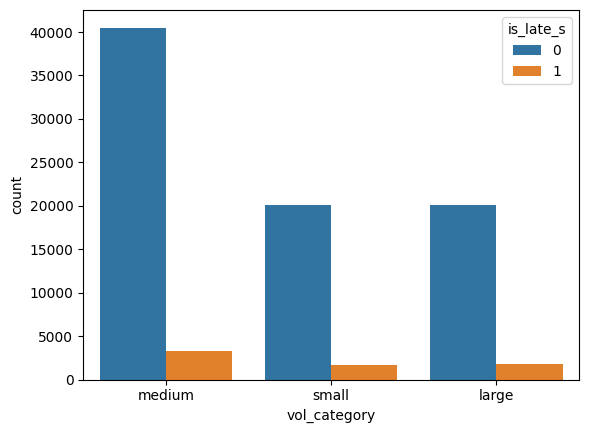

In [139]:
sns.countplot(x=tr_data['vol_category'],hue=tr_data['is_late_s'])

Do larger products have more late deliveries?

Are small or medium ones generally delivered on time?

Is there a disproportionate number of late deliveries in any specific group?

Get late deliveries count per volume category

In [141]:
tr_data['vol_category'].value_counts()

vol_category
medium    43771
large     21864
small     21783
Name: count, dtype: int64

In [144]:
vol_late = tr_data[tr_data.is_late_s == 1]['vol_category'].value_counts().rename_axis('vol_category').reset_index(name='late_counts')
vol_late

,vol_category,late_counts
0,medium,3264
1,large,1815
2,small,1659


Total number of orders by volume category

Counts all orders in each volume category (not just late ones).

In [145]:
vol_all = tr_data['vol_category'].value_counts().rename_axis('vol_category').reset_index(name='all_counts')

Map total counts into vol_late DataFrame

In [146]:
vol_late['all_count'] = vol_late.vol_category.map(vol_all.set_index('vol_category')['all_counts'])

Calculate proportion of late deliveries

In [147]:
vol_late['late_prop'] = vol_late['late_counts']/vol_late['all_count']
vol_list = vol_late['vol_category'].to_list()
vol_late

,vol_category,late_counts,all_count,late_prop
0,medium,3264,43771,0.074570
1,large,1815,21864,0.083013
2,small,1659,21783,0.076160


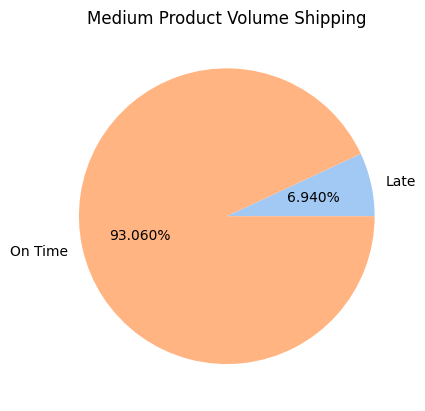

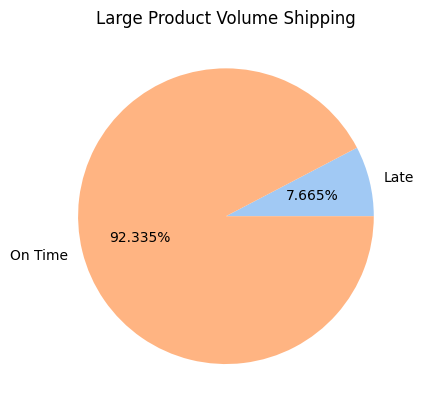

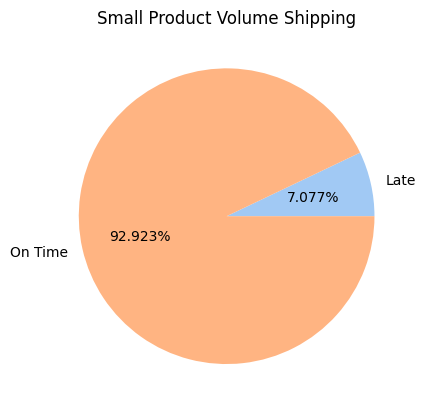

In [148]:
for i in range(0, len(vol_late)):
    data = [vol_late['late_counts'][i], vol_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title(vol_late['vol_category'][i].title() + ' Product Volume Shipping')
    plt.show()

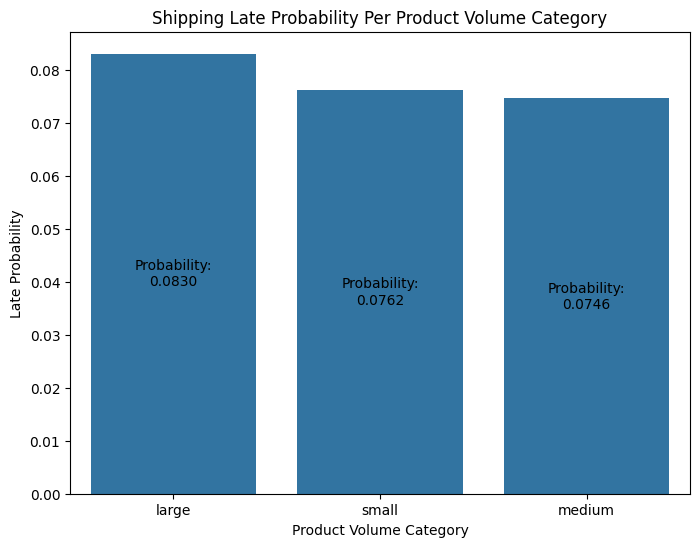

In [150]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x='vol_category', y='late_prop', data=vol_late, capsize=0.2, ax=ax, order=vol_late.sort_values(by='late_prop', ascending=False).vol_category).set(title='Shipping Late Probability Per Product Volume Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(xlabel='Product Volume Category')
ax.set(ylabel='Late Probability')
plt.show()

Based on the visualization above, it is known that the risk probability of a package being late from highest to lowest is sequentially 'held' by products that have small, large and medium volumes.

In [152]:
vol_list

['medium', 'large', 'small']

In [151]:
def propVolLate(data):
    if(data in vol_list):
        return vol_late[vol_late.vol_category == data]['late_prop'].values[0]
    else:
        return 0

tr_data['vol_late_prop'] = tr_data['vol_category'].apply(propVolLate)
tr_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0,0,4116.0,medium,0.07457
89312,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0,0,4096.0,medium,0.07457
89313,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0,0,3960.0,medium,0.07457
89314,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0,0,352.0,small,0.07616


In [153]:
ts_data['vol_late_prop'] = ts_data['vol_category'].apply(propVolLate)
ts_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,QKBW3XKevmfn,Dw3aCTFf4Q4G,2018-08-24 11:54:56,2018-08-24 12:05:22,26160,guarulhos,SP,wr6barwyoaIE,XURInBuULfIO,99.25,37.66,1,credit_card,1,209.51,toys,200.0,16.0,28.0,11.0,4928.0,medium,0.074570
38275,Tjiw9bj8HtLr,JmHJqJvpVcJs,2017-03-25 20:39:11,2017-03-25 20:50:17,39628,rio de janeiro,RJ,sPZVXBD9lf3e,wR4cqCClYDyY,86.32,40.98,1,credit_card,2,323.31,toys,5150.0,22.0,3.0,22.0,1452.0,small,0.076160
38276,mCPofb7A1aTq,ro5DikwWCC3j,2018-08-16 13:39:30,2018-08-17 03:31:06,89284,santana de parnaiba,SP,Th6SHMsyTOMH,Gp2lLacVPwug,104.45,30.24,1,wallet,1,170.71,toys,430.0,21.0,11.0,17.0,3927.0,medium,0.074570
38277,scVuqN10zbgb,R25nE2rl77AU,2018-06-27 13:17:05,2018-06-28 08:50:58,60867,sao paulo,SP,PyjlDSHRGdSt,al4fWZ5NFQzG,223.87,74.75,1,credit_card,10,100.65,toys,1850.0,24.0,36.0,23.0,19872.0,large,0.083013


### Day Of Week
Day Of Week is a representation of the days of the week, we will use the dt.dayofweek library from pandas, which will represent the days of the week into numbers (0=Monday -> 6=Sunday)

In [157]:
tr_data['purchase_day_of_week'] = tr_data['order_purchase_timestamp'].dt.dayofweek
tr_data['approved_day_of_week'] = tr_data['order_approved_at'].dt.dayofweek
tr_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4


In [158]:
ts_data['purchase_day_of_week'] = ts_data['order_purchase_timestamp'].dt.dayofweek
ts_data['approved_day_of_week'] = ts_data['order_approved_at'].dt.dayofweek
ts_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160,5,5
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160,5,5
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570,0,1
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013,4,4
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013,5,1


<Axes: xlabel='purchase_day_of_week', ylabel='count'>

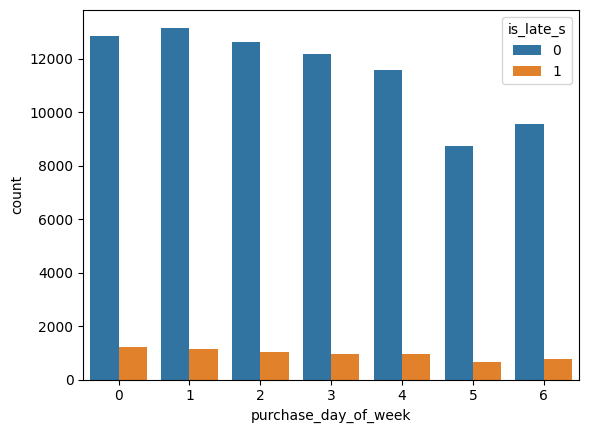

In [160]:
sns.countplot(x=tr_data['purchase_day_of_week'], hue=tr_data['is_late_s'])


In [161]:
pur_late = tr_data[tr_data.is_late_s == 1]['purchase_day_of_week'].value_counts().rename_axis('purchase_day_of_week').reset_index(name='late_counts')
pur_all = tr_data['purchase_day_of_week'].value_counts().rename_axis('purchase_day_of_week').reset_index(name='all_counts')
pur_late['all_count'] = pur_late.purchase_day_of_week.map(pur_all.set_index('purchase_day_of_week')['all_counts'])
pur_late['late_prop'] = pur_late['late_counts'] / pur_late['all_count']
pur_late['day_of_week'] = pur_late['purchase_day_of_week'].map({0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
pur_list = pur_late['purchase_day_of_week'].to_list()
pur_late

,purchase_day_of_week,late_counts,all_count,late_prop,day_of_week
0,0,1226,14087,0.087031,Monday
1,1,1137,14300,0.079510,Tuesday
2,2,1017,13629,0.074620,Wednesday
3,3,973,13159,0.073942,Thursday
4,4,957,12516,0.076462,Friday
5,6,779,10339,0.075346,Sunday
6,5,649,9388,0.069131,Saturday


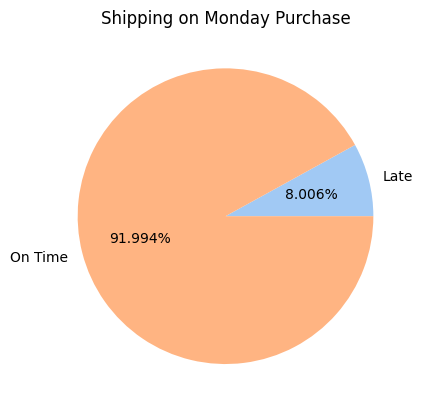

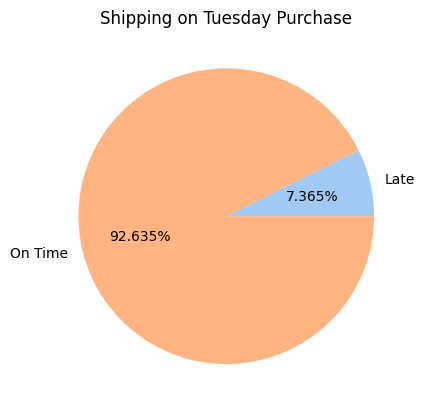

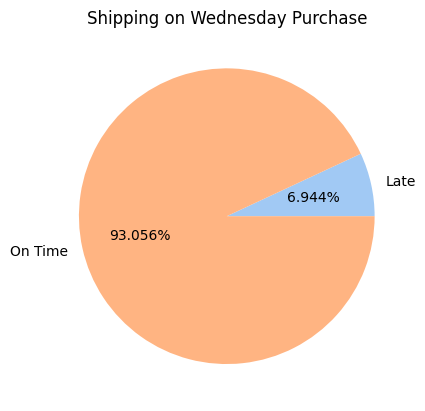

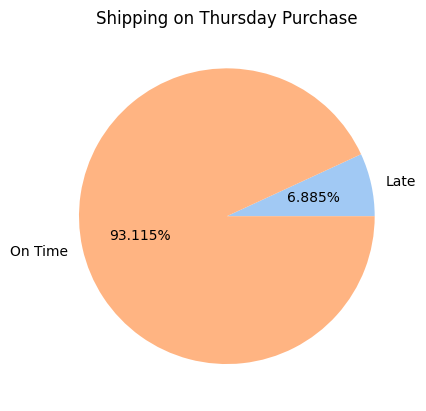

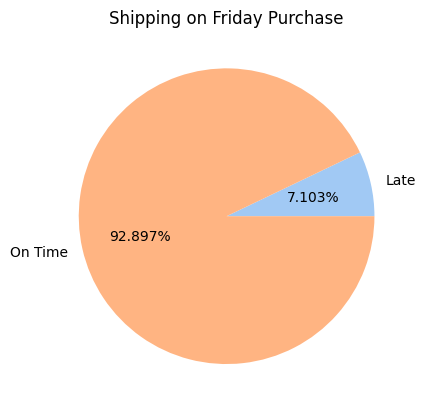

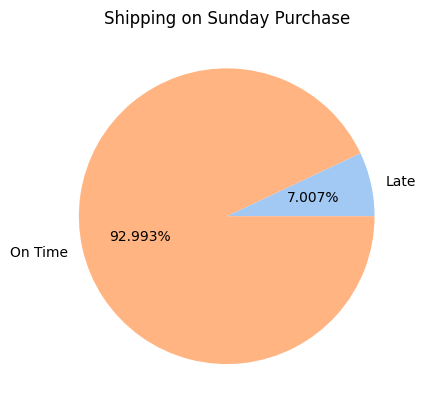

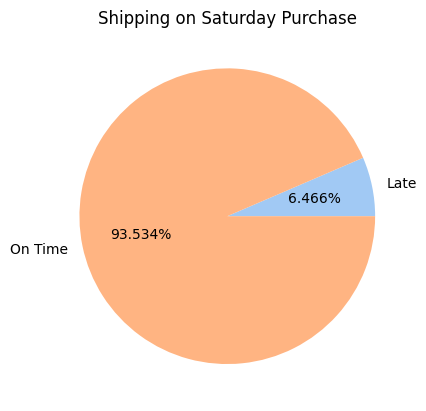

In [162]:
for i in range(0, len(pur_late)):
    data = [pur_late['late_counts'][i], pur_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Shipping on '+pur_late['day_of_week'][i].title()+' ' + 'Purchase')
    plt.show()

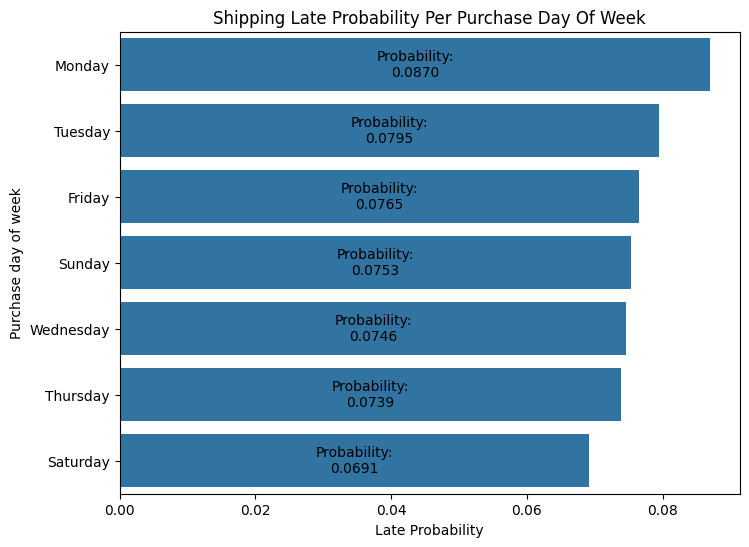

In [163]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='day_of_week', x='late_prop', data=pur_late, capsize=0.2, ax=ax, order=pur_late.sort_values(by='late_prop', ascending=False).day_of_week).set(title='Shipping Late Probability Per Purchase Day Of Week')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(ylabel='Purchase day of week')
ax.set(xlabel='Late Probability')
plt.show()

It appears that the highest probability of data delays occurs on Monday purchases, the lowest on Saturday purchases

In [164]:
def propPurLate(data):
    if(data in pur_list):
        return pur_late[pur_late.purchase_day_of_week == data]['late_prop'].values[0]
    else:
        return 0

tr_data['pur_late_prop'] = tr_data['purchase_day_of_week'].apply(propPurLate)
tr_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0,0,4116.0,medium,0.07457,6,1,0.075346
89312,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462
89313,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0,0,3960.0,medium,0.07457,1,1,0.079510
89314,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0,0,352.0,small,0.07616,5,5,0.069131


In [165]:
ts_data['pur_late_prop'] = ts_data['purchase_day_of_week'].apply(propPurLate)
ts_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160,5,5,0.069131
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160,5,5,0.069131
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570,0,1,0.087031
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013,4,4,0.076462
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013,5,1,0.069131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,QKBW3XKevmfn,Dw3aCTFf4Q4G,2018-08-24 11:54:56,2018-08-24 12:05:22,26160,guarulhos,SP,wr6barwyoaIE,XURInBuULfIO,99.25,37.66,1,credit_card,1,209.51,toys,200.0,16.0,28.0,11.0,4928.0,medium,0.074570,4,4,0.076462
38275,Tjiw9bj8HtLr,JmHJqJvpVcJs,2017-03-25 20:39:11,2017-03-25 20:50:17,39628,rio de janeiro,RJ,sPZVXBD9lf3e,wR4cqCClYDyY,86.32,40.98,1,credit_card,2,323.31,toys,5150.0,22.0,3.0,22.0,1452.0,small,0.076160,5,5,0.069131
38276,mCPofb7A1aTq,ro5DikwWCC3j,2018-08-16 13:39:30,2018-08-17 03:31:06,89284,santana de parnaiba,SP,Th6SHMsyTOMH,Gp2lLacVPwug,104.45,30.24,1,wallet,1,170.71,toys,430.0,21.0,11.0,17.0,3927.0,medium,0.074570,3,4,0.073942
38277,scVuqN10zbgb,R25nE2rl77AU,2018-06-27 13:17:05,2018-06-28 08:50:58,60867,sao paulo,SP,PyjlDSHRGdSt,al4fWZ5NFQzG,223.87,74.75,1,credit_card,10,100.65,toys,1850.0,24.0,36.0,23.0,19872.0,large,0.083013,2,3,0.074620


In [167]:
app_late = tr_data[tr_data.is_late_s == 1]['approved_day_of_week'].value_counts().rename_axis('approved_day_of_week').reset_index(name='late_counts')
app_all = tr_data['approved_day_of_week'].value_counts().rename_axis('approved_day_of_week').reset_index(name='all_counts')
app_late['all_count'] = app_late.approved_day_of_week.map(app_all.set_index('approved_day_of_week')['all_counts'])
app_late['late_prop'] = app_late['late_counts'] / app_late['all_count']
app_late['day_of_week'] = app_late['approved_day_of_week'].map({0: 'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'})
app_list = app_late['approved_day_of_week'].to_list()
app_late

,approved_day_of_week,late_counts,all_count,late_prop,day_of_week
0,1,1314,16914,0.077687,Tuesday
1,2,1090,13775,0.079129,Wednesday
2,4,1079,13041,0.082739,Friday
3,0,965,11345,0.085059,Monday
4,3,951,13795,0.068938,Thursday
5,5,778,10769,0.072244,Saturday
6,6,561,7779,0.072117,Sunday


In [168]:
app_list

[1, 2, 4, 0, 3, 5, 6]

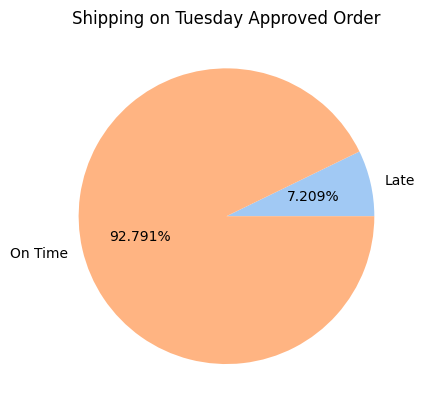

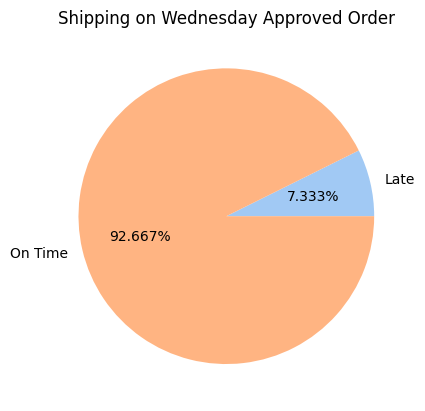

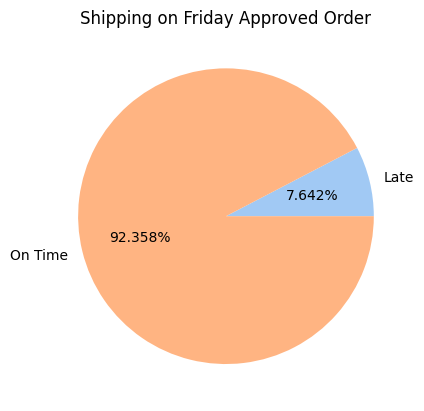

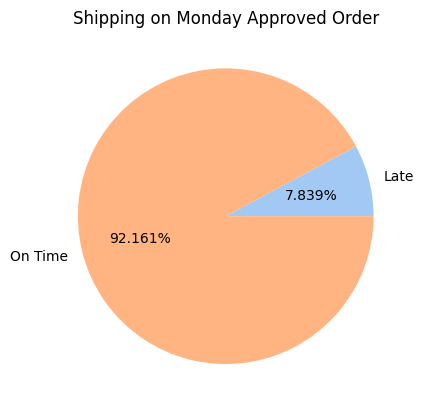

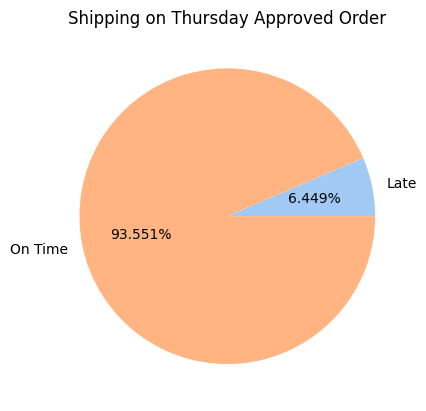

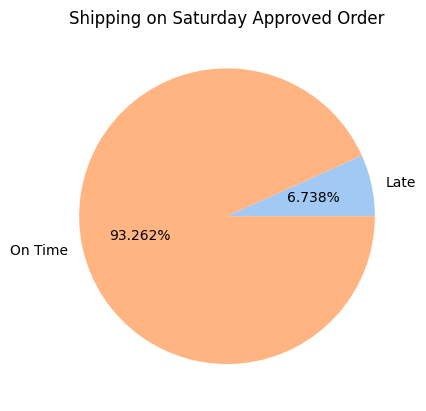

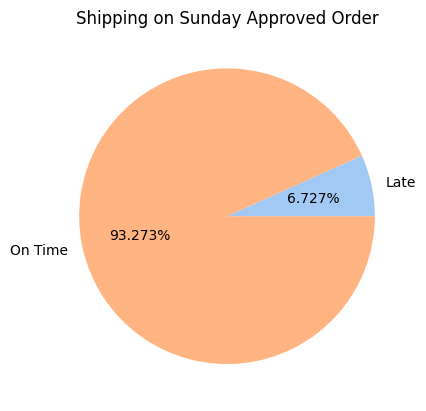

In [169]:
for i in range(0, len(app_late)):
    data = [app_late['late_counts'][i], app_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Shipping on '+app_late['day_of_week'][i].title()+' ' + 'Approved Order')
    plt.show()

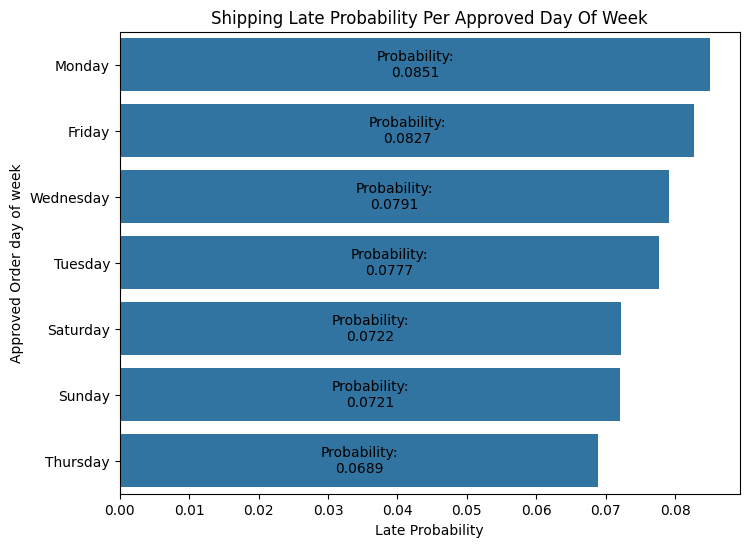

In [170]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='day_of_week', x='late_prop', data=app_late, capsize=0.2, ax=ax, order=app_late.sort_values(by='late_prop', ascending=False).day_of_week).set(title='Shipping Late Probability Per Approved Day Of Week')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(ylabel='Approved Order day of week')
ax.set(xlabel='Late Probability')
plt.show()

It appears that the risk of delays is highest for approved orders on Mondays, lowest on Tuesdays

In [171]:
def propAppLate(data):
    if(data in app_list):
        return app_late[app_late.approved_day_of_week == data]['late_prop'].values[0]
    else:
        return 0

tr_data['app_late_prop'] = tr_data['approved_day_of_week'].apply(propAppLate)
tr_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346,0.072117
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620,0.079129
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131,0.072244
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462,0.082739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0,0,4116.0,medium,0.07457,6,1,0.075346,0.077687
89312,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244
89313,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0,0,3960.0,medium,0.07457,1,1,0.079510,0.077687
89314,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0,0,352.0,small,0.07616,5,5,0.069131,0.072244


In [172]:
ts_data['app_late_prop'] = ts_data['approved_day_of_week'].apply(propAppLate)
ts_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160,5,5,0.069131,0.072244
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160,5,5,0.069131,0.072244
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570,0,1,0.087031,0.077687
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013,4,4,0.076462,0.082739
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013,5,1,0.069131,0.077687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,QKBW3XKevmfn,Dw3aCTFf4Q4G,2018-08-24 11:54:56,2018-08-24 12:05:22,26160,guarulhos,SP,wr6barwyoaIE,XURInBuULfIO,99.25,37.66,1,credit_card,1,209.51,toys,200.0,16.0,28.0,11.0,4928.0,medium,0.074570,4,4,0.076462,0.082739
38275,Tjiw9bj8HtLr,JmHJqJvpVcJs,2017-03-25 20:39:11,2017-03-25 20:50:17,39628,rio de janeiro,RJ,sPZVXBD9lf3e,wR4cqCClYDyY,86.32,40.98,1,credit_card,2,323.31,toys,5150.0,22.0,3.0,22.0,1452.0,small,0.076160,5,5,0.069131,0.072244
38276,mCPofb7A1aTq,ro5DikwWCC3j,2018-08-16 13:39:30,2018-08-17 03:31:06,89284,santana de parnaiba,SP,Th6SHMsyTOMH,Gp2lLacVPwug,104.45,30.24,1,wallet,1,170.71,toys,430.0,21.0,11.0,17.0,3927.0,medium,0.074570,3,4,0.073942,0.082739
38277,scVuqN10zbgb,R25nE2rl77AU,2018-06-27 13:17:05,2018-06-28 08:50:58,60867,sao paulo,SP,PyjlDSHRGdSt,al4fWZ5NFQzG,223.87,74.75,1,credit_card,10,100.65,toys,1850.0,24.0,36.0,23.0,19872.0,large,0.083013,2,3,0.074620,0.068938


### Hour
This is a clock feature, where the mapping is <br>(0->00.00, 23->23.00)

In [174]:
tr_data['purchase_hour'] = tr_data['order_purchase_timestamp'].dt.hour
tr_data['approved_hour'] = tr_data['order_approved_at'].dt.hour
tr_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346,0.072117,18,19
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620,0.079129,21,22
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,16,16
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131,0.072244,18,18
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462,0.082739,16,17


In [175]:
ts_data['purchase_hour'] = ts_data['order_purchase_timestamp'].dt.hour
ts_data['approved_hour'] = ts_data['order_approved_at'].dt.hour
ts_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160,5,5,0.069131,0.072244,12,12
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160,5,5,0.069131,0.072244,17,20
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570,0,1,0.087031,0.077687,11,7
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013,4,4,0.076462,0.082739,10,10
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013,5,1,0.069131,0.077687,10,4


<Axes: xlabel='purchase_hour', ylabel='count'>

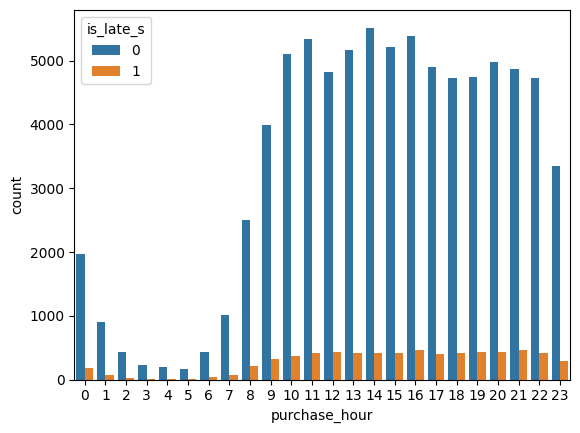

In [176]:
sns.countplot(x=tr_data['purchase_hour'], hue=tr_data['is_late_s'])

In [177]:
purh_late = tr_data[tr_data.is_late_s == 1]['purchase_hour'].value_counts().rename_axis('purchase_hour').reset_index(name='late_counts')
purh_all = tr_data['purchase_hour'].value_counts().rename_axis('purchase_hour').reset_index(name='all_counts')
purh_late['all_count'] = purh_late.purchase_hour.map(purh_all.set_index('purchase_hour')['all_counts'])
purh_late['late_prop'] = purh_late['late_counts'] / purh_late['all_count']
purh_list =purh_late['purchase_hour'].to_list()
purh_late['hour'] = purh_late['purchase_hour'].map({0: '00.00', 1: '01.00', 2: '02.00', 3:'03.00', 4:'04.00', 5:'05.00', 6:'06.00', 7:'07.00',8:'08.00',9:'09.00',10:'10.00',11:'11.00',12:'12.00',13:'13.00',14:'14.00',15:'15.00',16:'16.00',17:'17.00',18:'18.00',19:'19.00',20:'20.00',21:'21.00',22:'22.00',23:'23.00'})
purh_late

,purchase_hour,late_counts,all_count,late_prop,hour
0,21,462,5331,0.086663,21.00
1,16,457,5844,0.078200,16.00
2,20,440,5417,0.081226,20.00
3,19,427,5173,0.082544,19.00
4,12,425,5244,0.081045,12.00
5,14,424,5943,0.071344,14.00
6,13,424,5589,0.075863,13.00
7,15,418,5628,0.074271,15.00
8,18,416,5149,0.080792,18.00
9,11,414,5749,0.072013,11.00


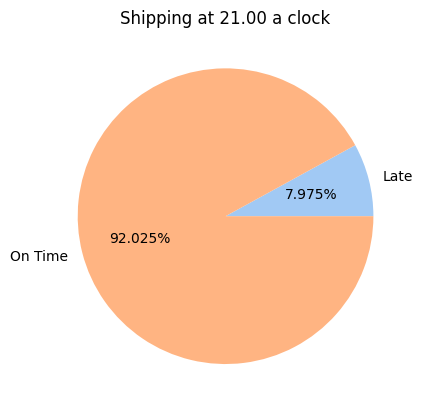

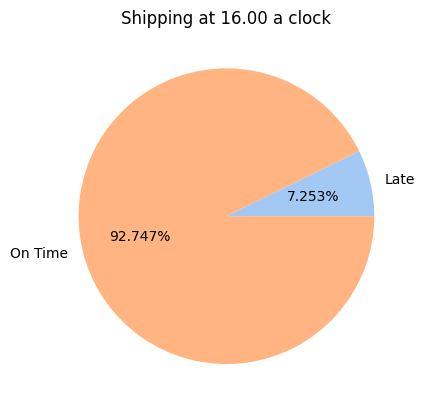

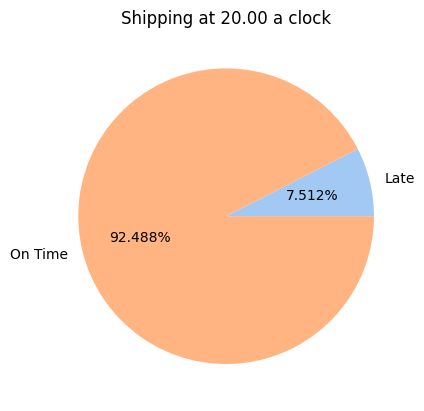

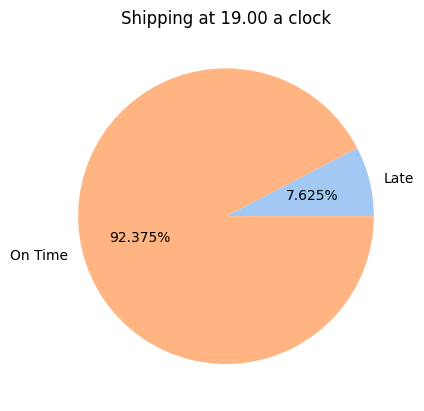

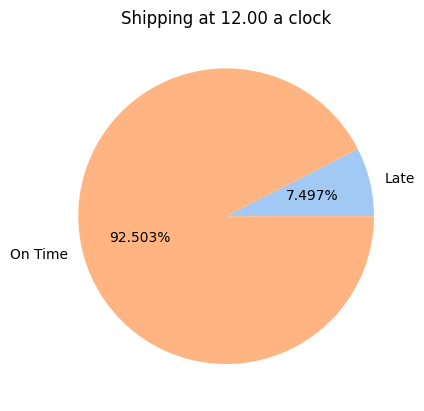

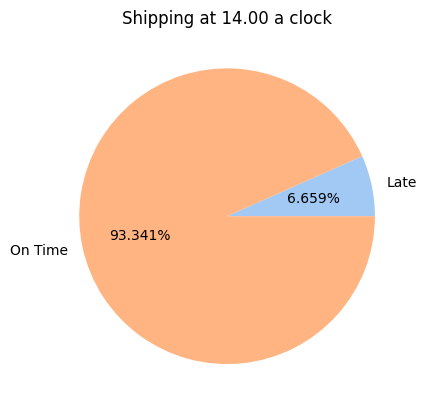

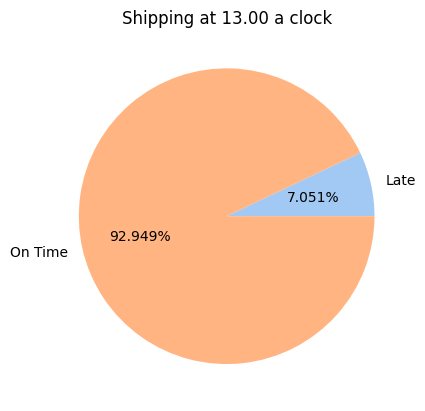

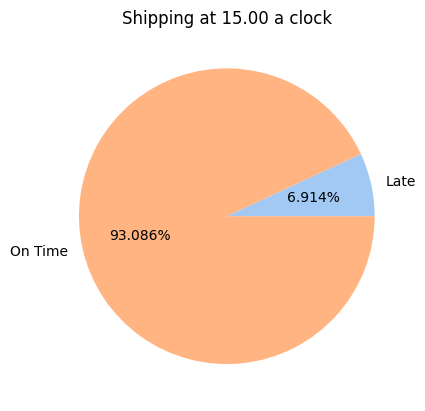

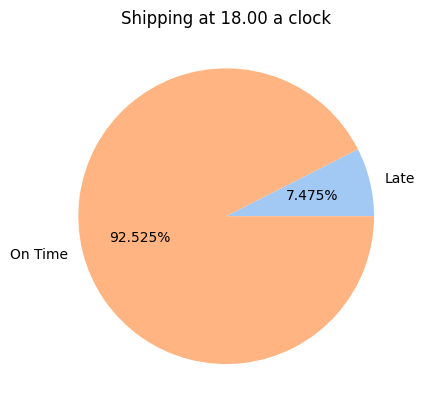

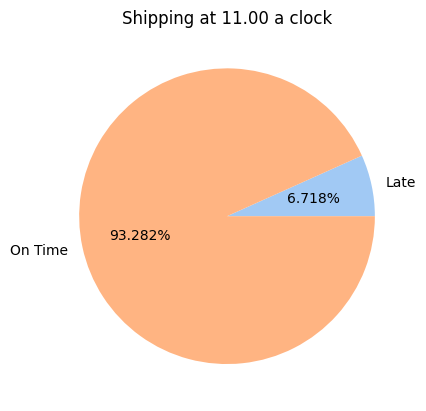

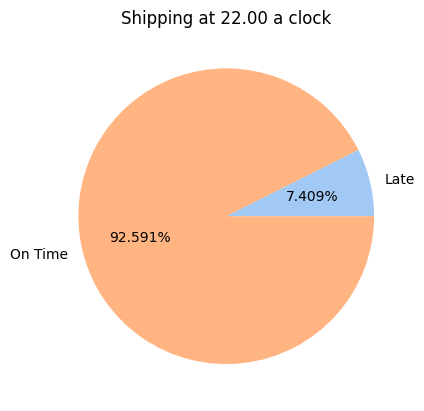

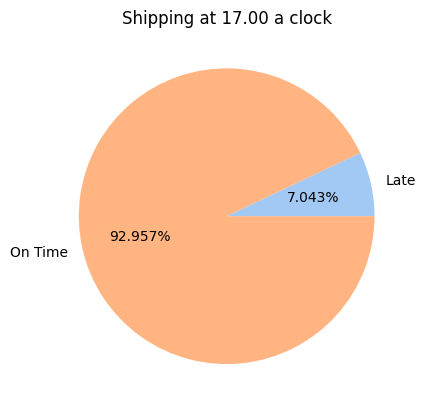

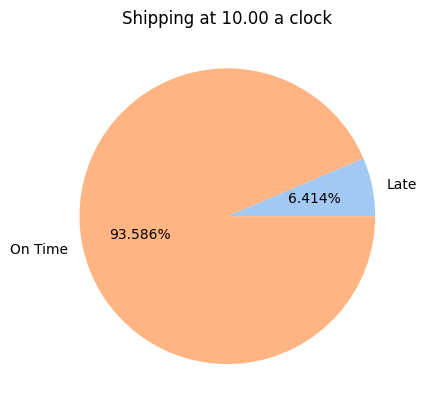

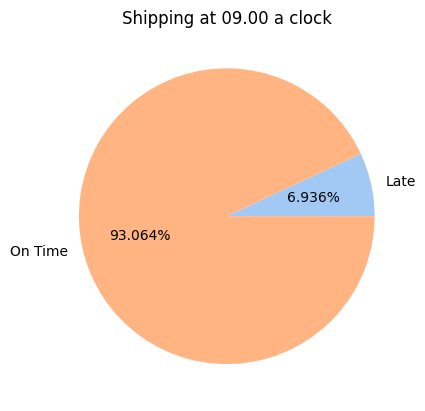

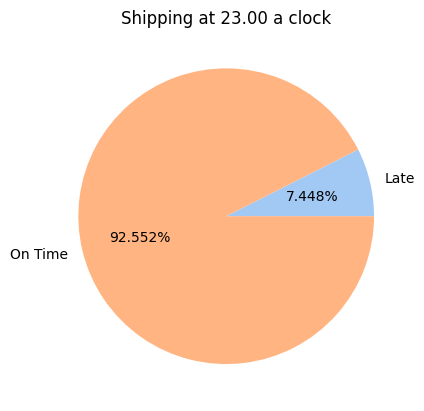

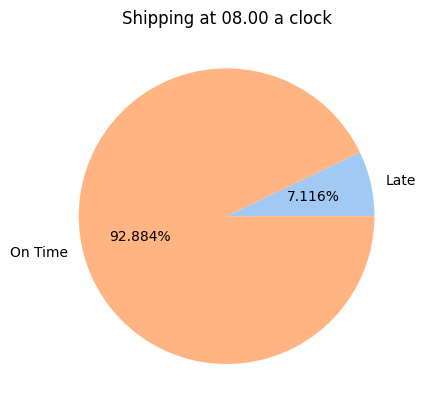

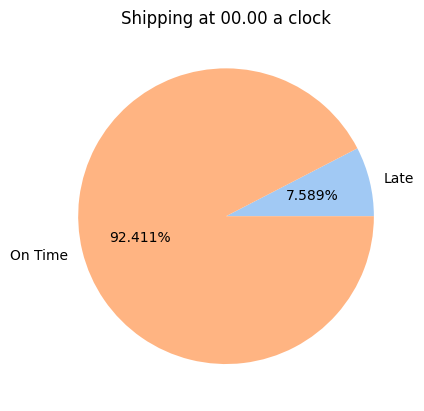

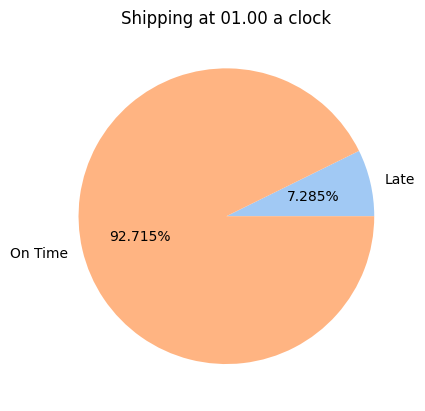

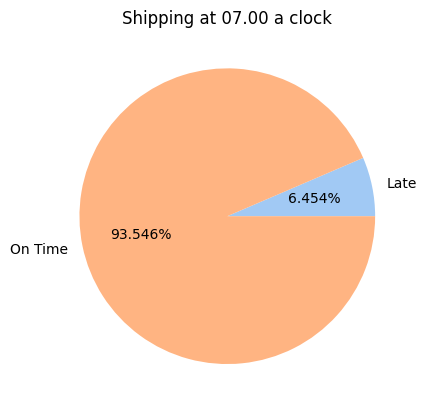

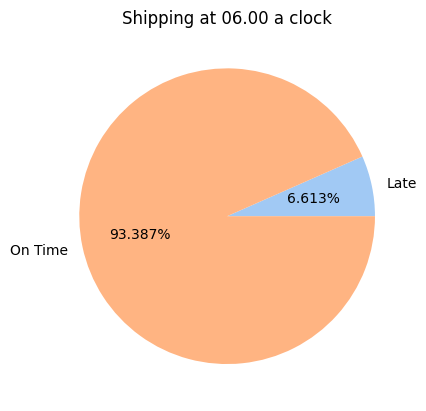

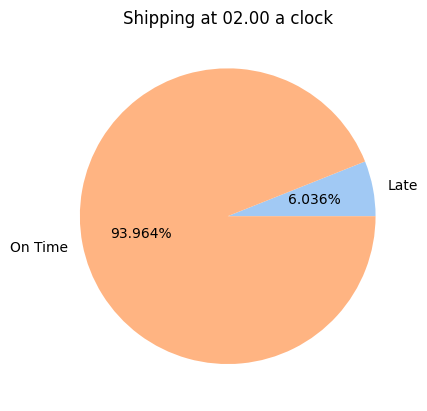

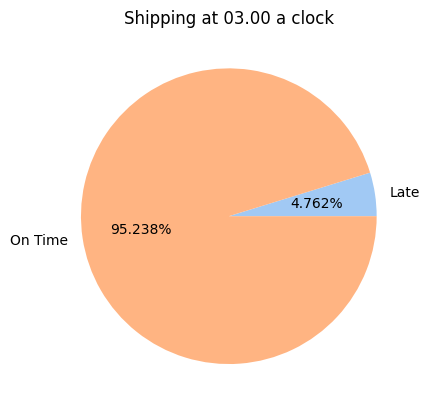

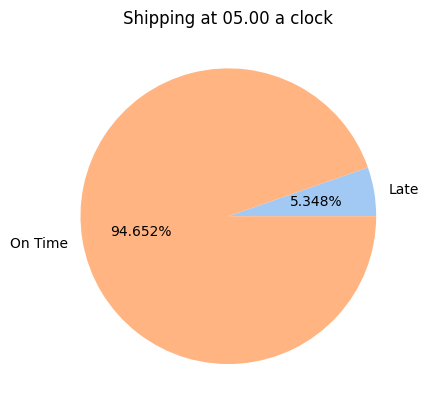

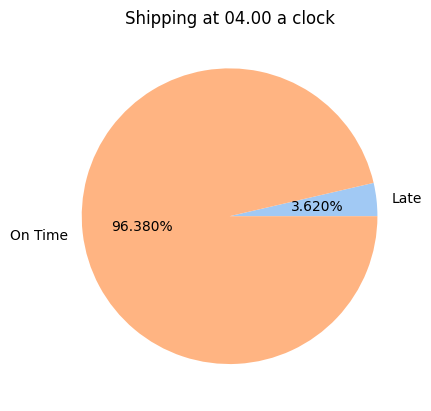

In [178]:
for i in range(0, len(purh_late)):
    data = [purh_late['late_counts'][i], purh_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Shipping at '+ purh_late['hour'][i].title()+' '+'a clock')
    plt.show()

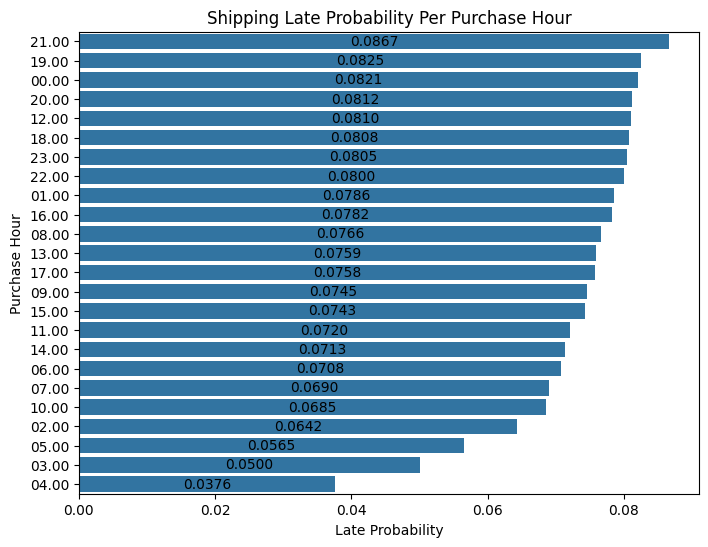

In [179]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='hour', x='late_prop', data=purh_late, capsize=0.2, ax=ax, order=purh_late.sort_values(by='late_prop', ascending=False).hour).set(title='Shipping Late Probability Per Purchase Hour')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Purchase Hour')
ax.set(xlabel='Late Probability')
plt.show()

Based on the data, it is known that the probability of being late is highest at 5 am

In [180]:
def propPurhLate(data):
    if(data in purh_list):
        return purh_late[purh_late.purchase_hour == data]['late_prop'].values[0]
    else:
        return 0

tr_data['purh_late_prop'] = tr_data['purchase_hour'].apply(propPurhLate)
tr_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346,0.072117,18,19,0.080792
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620,0.079129,21,22,0.086663
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,16,16,0.078200
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131,0.072244,18,18,0.080792
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462,0.082739,16,17,0.078200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0,0,4116.0,medium,0.07457,6,1,0.075346,0.077687,17,4,0.075763
89312,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,11,2,0.072013
89313,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0,0,3960.0,medium,0.07457,1,1,0.079510,0.077687,6,11,0.070815
89314,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0,0,352.0,small,0.07616,5,5,0.069131,0.072244,8,8,0.076610


In [181]:
ts_data['purh_late_prop'] = ts_data['purchase_hour'].apply(propPurhLate)
ts_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160,5,5,0.069131,0.072244,12,12,0.081045
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160,5,5,0.069131,0.072244,17,20,0.075763
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570,0,1,0.087031,0.077687,11,7,0.072013
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013,4,4,0.076462,0.082739,10,10,0.068538
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013,5,1,0.069131,0.077687,10,4,0.068538
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,QKBW3XKevmfn,Dw3aCTFf4Q4G,2018-08-24 11:54:56,2018-08-24 12:05:22,26160,guarulhos,SP,wr6barwyoaIE,XURInBuULfIO,99.25,37.66,1,credit_card,1,209.51,toys,200.0,16.0,28.0,11.0,4928.0,medium,0.074570,4,4,0.076462,0.082739,11,12,0.072013
38275,Tjiw9bj8HtLr,JmHJqJvpVcJs,2017-03-25 20:39:11,2017-03-25 20:50:17,39628,rio de janeiro,RJ,sPZVXBD9lf3e,wR4cqCClYDyY,86.32,40.98,1,credit_card,2,323.31,toys,5150.0,22.0,3.0,22.0,1452.0,small,0.076160,5,5,0.069131,0.072244,20,20,0.081226
38276,mCPofb7A1aTq,ro5DikwWCC3j,2018-08-16 13:39:30,2018-08-17 03:31:06,89284,santana de parnaiba,SP,Th6SHMsyTOMH,Gp2lLacVPwug,104.45,30.24,1,wallet,1,170.71,toys,430.0,21.0,11.0,17.0,3927.0,medium,0.074570,3,4,0.073942,0.082739,13,3,0.075863
38277,scVuqN10zbgb,R25nE2rl77AU,2018-06-27 13:17:05,2018-06-28 08:50:58,60867,sao paulo,SP,PyjlDSHRGdSt,al4fWZ5NFQzG,223.87,74.75,1,credit_card,10,100.65,toys,1850.0,24.0,36.0,23.0,19872.0,large,0.083013,2,3,0.074620,0.068938,13,8,0.075863


In [182]:
apph_late = tr_data[tr_data.is_late_s == 1]['approved_hour'].value_counts().rename_axis('approved_hour').reset_index(name='late_counts')
apph_all = tr_data['approved_hour'].value_counts().rename_axis('approved_hour').reset_index(name='all_counts')
apph_late['all_count'] = apph_late.approved_hour.map(apph_all.set_index('approved_hour')['all_counts'])
apph_late['late_prop'] = apph_late['late_counts'] / apph_late['all_count']
apph_list =apph_late['approved_hour'].to_list()
apph_late['hour'] = apph_late['approved_hour'].map({0: '00.00', 1: '01.00', 2: '02.00', 3:'03.00', 4:'04.00', 5:'05.00', 6:'06.00', 7:'07.00',8:'08.00',9:'09.00',10:'10.00',11:'11.00',12:'12.00',13:'13.00',14:'14.00',15:'15.00',16:'16.00',17:'17.00',18:'18.00',19:'19.00',20:'20.00',21:'21.00',22:'22.00',23:'23.00'})
apph_late

,approved_hour,late_counts,all_count,late_prop,hour
0,2,531,6175,0.085992,02.00
1,3,441,4816,0.091570,03.00
2,16,372,5192,0.071649,16.00
3,18,368,4432,0.083032,18.00
4,14,368,4732,0.077768,14.00
5,21,363,4129,0.087915,21.00
6,11,361,4791,0.075350,11.00
7,15,359,4677,0.076759,15.00
8,13,347,4764,0.072838,13.00
9,17,342,4806,0.071161,17.00


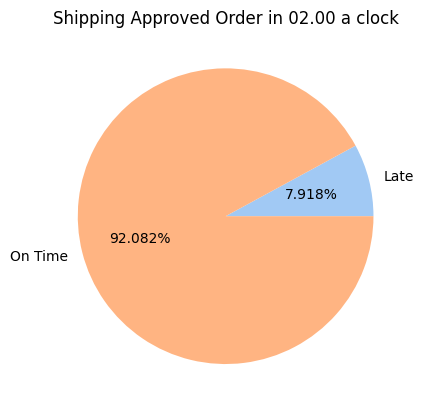

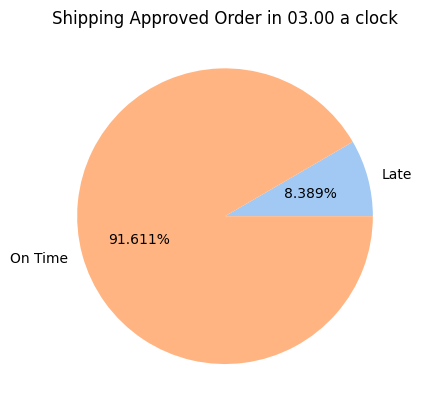

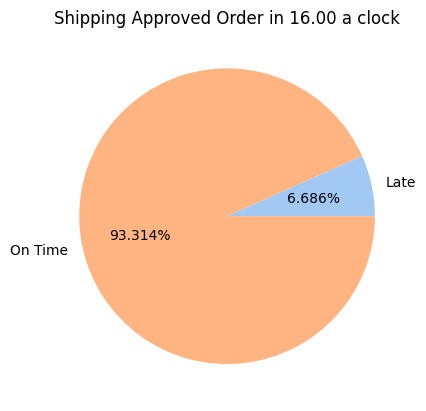

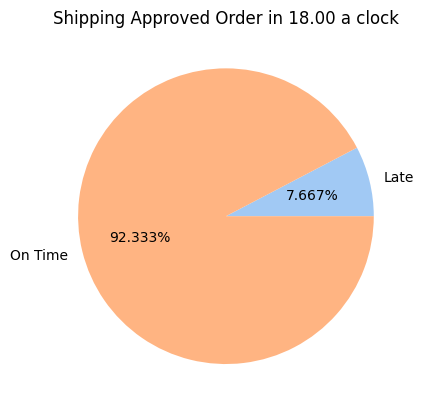

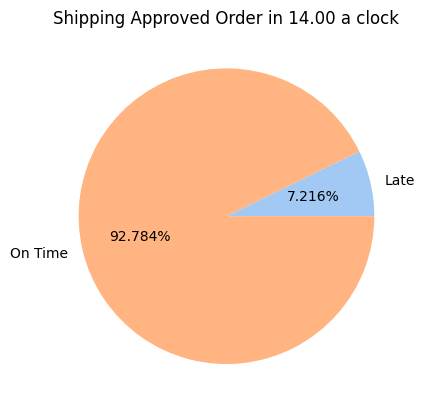

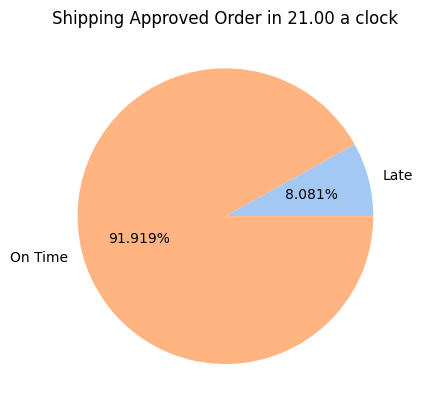

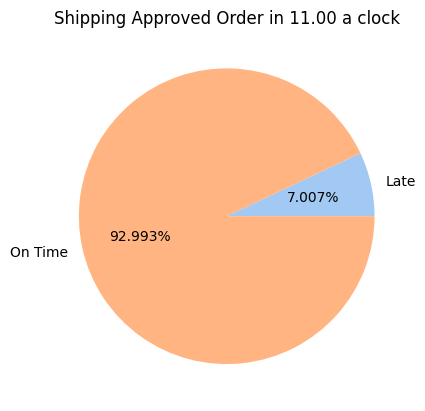

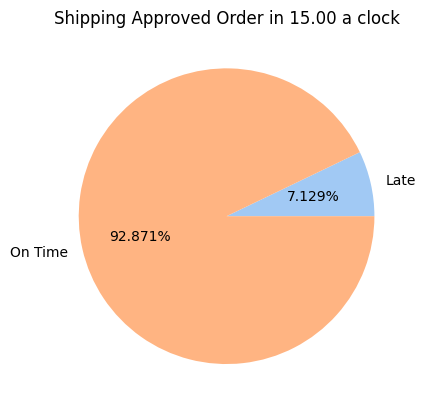

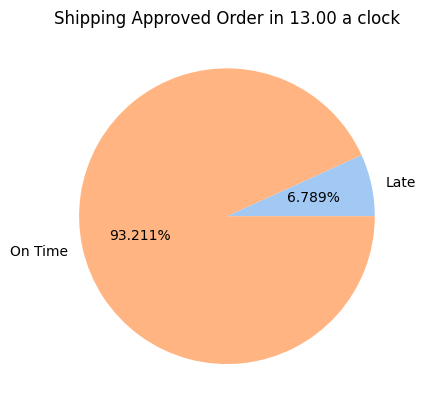

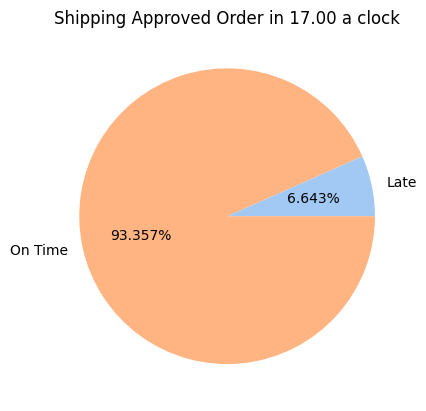

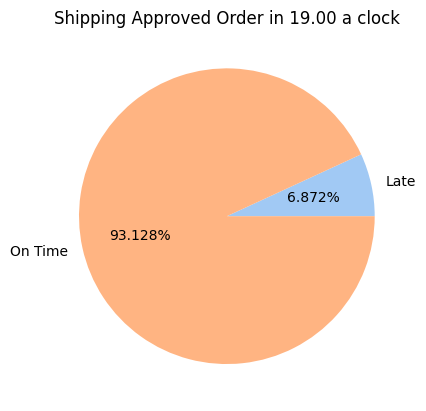

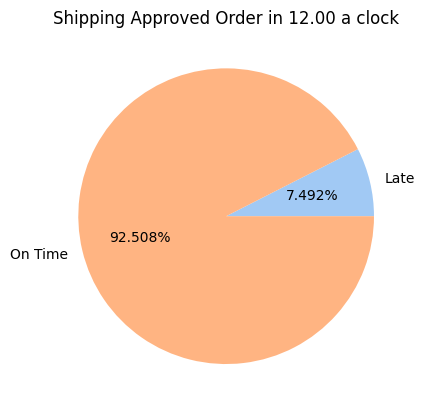

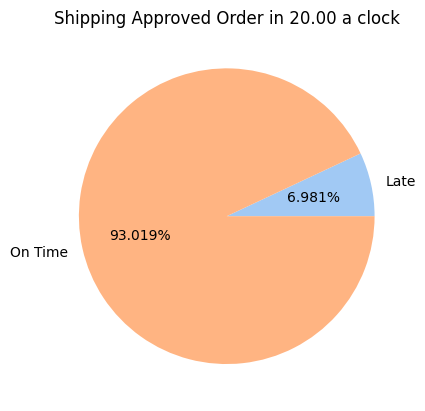

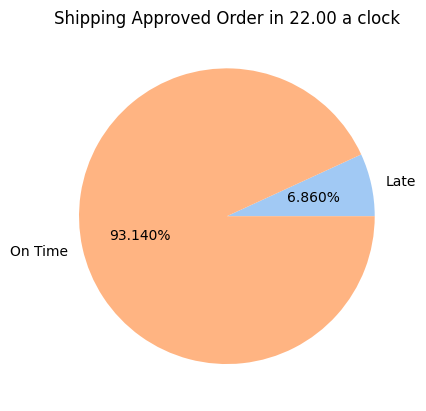

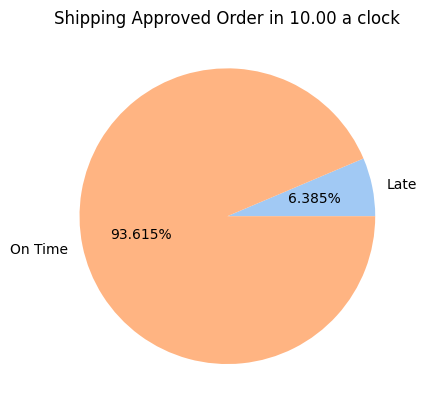

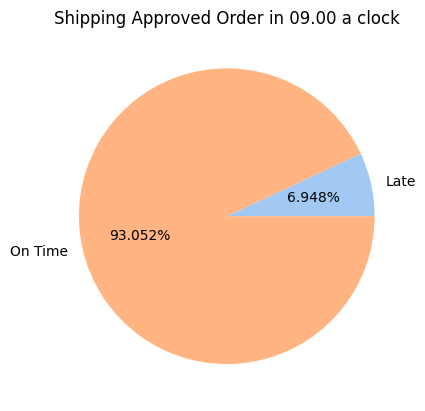

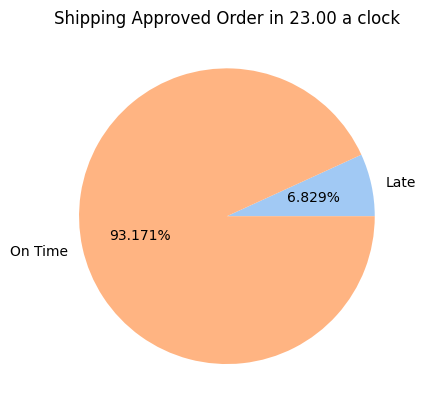

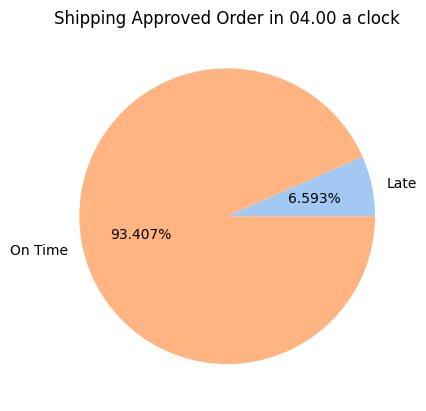

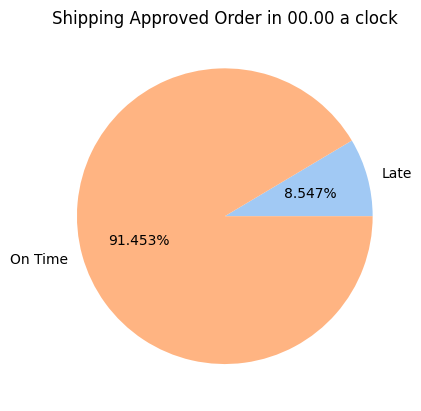

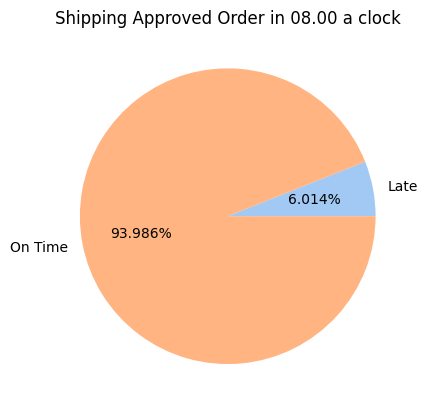

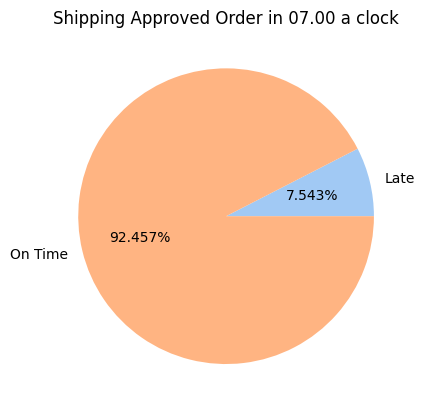

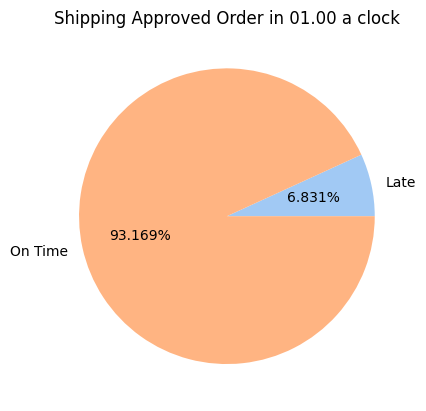

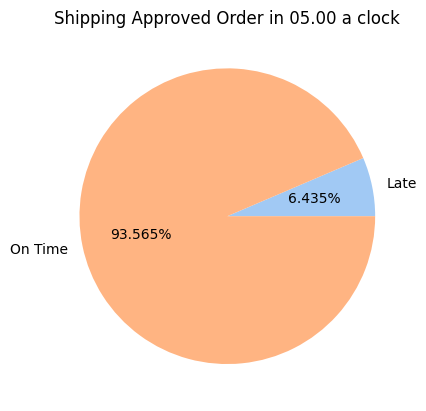

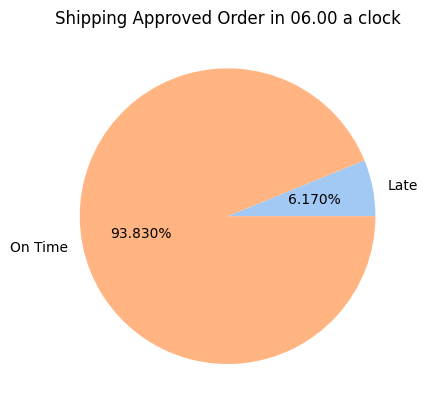

In [183]:
for i in range(0, len(apph_late)):
    data = [apph_late['late_counts'][i], apph_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Shipping Approved Order in ' + apph_late['hour'][i].title()+' '+'a clock')
    plt.show()

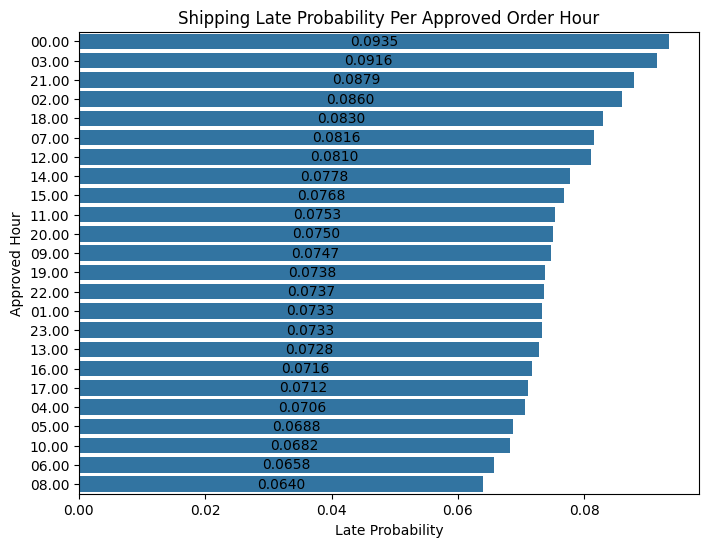

In [184]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(y='hour', x='late_prop', data=apph_late, capsize=0.2, ax=ax, order=apph_late.sort_values(by='late_prop', ascending=False).hour).set(title='Shipping Late Probability Per Approved Order Hour')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='%.4f', label_type='center')

ax.set(ylabel='Approved Hour')
ax.set(xlabel='Late Probability')
plt.show()

Based on the data, it is known that the highest risk of delivery delays occurs at 3 am

In [185]:
def propApphLate(data):
    if(data in apph_list):
        return apph_late[apph_late.approved_hour == data]['late_prop'].values[0]
    else:
        return 0

tr_data['apph_late_prop'] = tr_data['approved_hour'].apply(propApphLate)
tr_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346,0.072117,18,19,0.080792,0.073792
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620,0.079129,21,22,0.086663,0.073651
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,16,16,0.078200,0.071649
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131,0.072244,18,18,0.080792,0.083032
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462,0.082739,16,17,0.078200,0.071161
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0,0,4116.0,medium,0.07457,6,1,0.075346,0.077687,17,4,0.075763,0.070580
89312,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,11,2,0.072013,0.085992
89313,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0,0,3960.0,medium,0.07457,1,1,0.079510,0.077687,6,11,0.070815,0.075350
89314,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0,0,352.0,small,0.07616,5,5,0.069131,0.072244,8,8,0.076610,0.063984


In [186]:
ts_data['apph_late_prop'] = ts_data['approved_hour'].apply(propApphLate)
ts_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160,5,5,0.069131,0.072244,12,12,0.081045,0.080988
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160,5,5,0.069131,0.072244,17,20,0.075763,0.075046
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570,0,1,0.087031,0.077687,11,7,0.072013,0.081587
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013,4,4,0.076462,0.082739,10,10,0.068538,0.068203
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013,5,1,0.069131,0.077687,10,4,0.068538,0.070580
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,QKBW3XKevmfn,Dw3aCTFf4Q4G,2018-08-24 11:54:56,2018-08-24 12:05:22,26160,guarulhos,SP,wr6barwyoaIE,XURInBuULfIO,99.25,37.66,1,credit_card,1,209.51,toys,200.0,16.0,28.0,11.0,4928.0,medium,0.074570,4,4,0.076462,0.082739,11,12,0.072013,0.080988
38275,Tjiw9bj8HtLr,JmHJqJvpVcJs,2017-03-25 20:39:11,2017-03-25 20:50:17,39628,rio de janeiro,RJ,sPZVXBD9lf3e,wR4cqCClYDyY,86.32,40.98,1,credit_card,2,323.31,toys,5150.0,22.0,3.0,22.0,1452.0,small,0.076160,5,5,0.069131,0.072244,20,20,0.081226,0.075046
38276,mCPofb7A1aTq,ro5DikwWCC3j,2018-08-16 13:39:30,2018-08-17 03:31:06,89284,santana de parnaiba,SP,Th6SHMsyTOMH,Gp2lLacVPwug,104.45,30.24,1,wallet,1,170.71,toys,430.0,21.0,11.0,17.0,3927.0,medium,0.074570,3,4,0.073942,0.082739,13,3,0.075863,0.091570
38277,scVuqN10zbgb,R25nE2rl77AU,2018-06-27 13:17:05,2018-06-28 08:50:58,60867,sao paulo,SP,PyjlDSHRGdSt,al4fWZ5NFQzG,223.87,74.75,1,credit_card,10,100.65,toys,1850.0,24.0,36.0,23.0,19872.0,large,0.083013,2,3,0.074620,0.068938,13,8,0.075863,0.063984


### Approved and Purchase Gap

In [187]:
tr_data['approved_min_purchase'] = ((tr_data['order_approved_at'] - tr_data['order_purchase_timestamp']).astype('timedelta64[s]') / pd.Timedelta(hours=1)).astype(int)
tr_data['approved_min_purchase'].astype(float)
tr_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop,approved_min_purchase
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346,0.072117,18,19,0.080792,0.073792,0
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620,0.079129,21,22,0.086663,0.073651,0
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,16,16,0.078200,0.071649,23
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131,0.072244,18,18,0.080792,0.083032,0
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462,0.082739,16,17,0.078200,0.071161,0


In [188]:
tr_data[tr_data['is_late_s'] == 1]['approved_min_purchase'].describe()

count    6738.000000
mean       12.368804
std        29.678677
min         0.000000
25%         0.000000
50%         0.000000
75%        20.000000
max       741.000000
Name: approved_min_purchase, dtype: float64

In [189]:
ts_data['approved_min_purchase'] = ((ts_data['order_approved_at'] - ts_data['order_purchase_timestamp']).astype('timedelta64[s]') / pd.Timedelta(hours=1)).astype(int)
ts_data['approved_min_purchase'].astype(float)
ts_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop,approved_min_purchase
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160,5,5,0.069131,0.072244,12,12,0.081045,0.080988,0
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160,5,5,0.069131,0.072244,17,20,0.075763,0.075046,2
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570,0,1,0.087031,0.077687,11,7,0.072013,0.081587,20
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013,4,4,0.076462,0.082739,10,10,0.068538,0.068203,0
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013,5,1,0.069131,0.077687,10,4,0.068538,0.070580,66


In [190]:
sectil = tr_data['approved_min_purchase'].quantile([0.25]).values[0]
thirtil = tr_data['approved_min_purchase'].quantile([0.75]).values[0]
tr_data['apmpu_category'] = tr_data['approved_min_purchase'].apply(lambda x:'slow' if x>=thirtil else ('fast' if x>=sectil and x<thirtil else 'fast'))
ts_data['apmpu_category'] = ts_data['approved_min_purchase'].apply(lambda x:'slow' if x>=thirtil else ('fast' if x>=sectil and x<thirtil else 'fast'))

tr_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop,approved_min_purchase,apmpu_category
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346,0.072117,18,19,0.080792,0.073792,0,fast
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620,0.079129,21,22,0.086663,0.073651,0,fast
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,16,16,0.078200,0.071649,23,slow
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131,0.072244,18,18,0.080792,0.083032,0,fast
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462,0.082739,16,17,0.078200,0.071161,0,fast


In [191]:
apmpu_late = tr_data[tr_data.is_late_s == 1]['apmpu_category'].value_counts().rename_axis('apmpu_category').reset_index(name='late_counts')
apmpu_all = tr_data['apmpu_category'].value_counts().rename_axis('apmpu_category').reset_index(name='all_counts')
apmpu_late['all_count'] = apmpu_late.apmpu_category.map(apmpu_all.set_index('apmpu_category')['all_counts'])
apmpu_late['late_prop'] = apmpu_late['late_counts'] / apmpu_late['all_count']
apmpu_list = apmpu_late['apmpu_category'].to_list()
apmpu_late

,apmpu_category,late_counts,all_count,late_prop
0,fast,4688,64944,0.072185
1,slow,2050,22474,0.091217


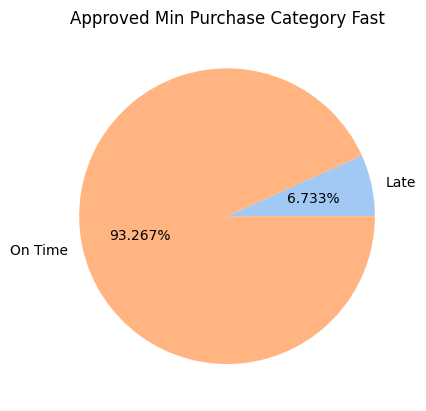

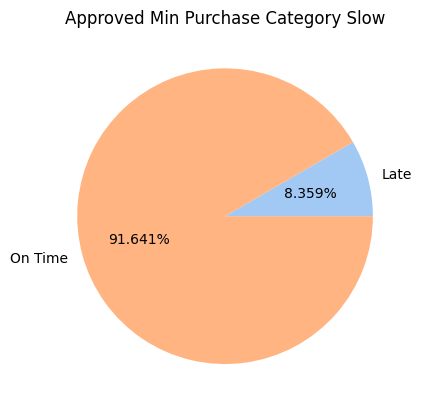

In [192]:
for i in range(0, len(apmpu_late)):
    data = [apmpu_late['late_counts'][i], apmpu_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Approved Min Purchase Category'+' '+apmpu_late['apmpu_category'][i].title())
    plt.show()

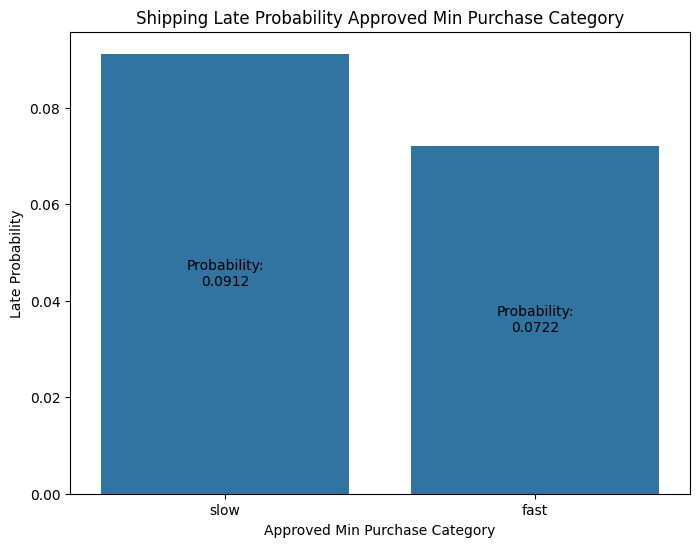

In [193]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x='apmpu_category', y='late_prop', data=apmpu_late, capsize=0.2, ax=ax, order=apmpu_late.sort_values(by='late_prop', ascending=False).apmpu_category).set(title='Shipping Late Probability Approved Min Purchase Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(xlabel='Approved Min Purchase Category')
ax.set(ylabel='Late Probability')
plt.show()

Based on the data, it is known that the greater the gap between the time the order is paid (order_purchased) and the time the order is received (order_approved), the greater the risk of delivery delays.

In [195]:
def propApmpuLate(data):
    if(data in apmpu_list):
        return apmpu_late[apmpu_late.apmpu_category == data]['late_prop'].values[0]
    else:
        return 0

tr_data['apmpu_late_prop'] = tr_data['apmpu_category'].apply(propApmpuLate)
ts_data['apmpu_late_prop'] = ts_data['apmpu_category'].apply(propApmpuLate)

tr_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop,approved_min_purchase,apmpu_category,apmpu_late_prop
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346,0.072117,18,19,0.080792,0.073792,0,fast,0.072185
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620,0.079129,21,22,0.086663,0.073651,0,fast,0.072185
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,16,16,0.078200,0.071649,23,slow,0.091217
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131,0.072244,18,18,0.080792,0.083032,0,fast,0.072185
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462,0.082739,16,17,0.078200,0.071161,0,fast,0.072185
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0,0,4116.0,medium,0.07457,6,1,0.075346,0.077687,17,4,0.075763,0.070580,35,slow,0.091217
89312,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,11,2,0.072013,0.085992,15,slow,0.091217
89313,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0,0,3960.0,medium,0.07457,1,1,0.079510,0.077687,6,11,0.070815,0.075350,4,fast,0.072185
89314,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0,0,352.0,small,0.07616,5,5,0.069131,0.072244,8,8,0.076610,0.063984,0,fast,0.072185


### Price Category

In [196]:
tr_data['price'].describe()

count    87418.000000
mean       342.290084
std        559.765708
min          0.850000
25%         59.650000
50%        136.900000
75%        399.200000
max       6735.000000
Name: price, dtype: float64

In [197]:
sectil = tr_data['price'].quantile([0.25]).values[0]
thirtil = tr_data['price'].quantile([0.75]).values[0]
tr_data['price_category'] = tr_data['price'].apply(lambda x:'expensive' if x>=thirtil else ('affordable' if x>=sectil and x<thirtil else 'cheap'))
tr_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop,approved_min_purchase,apmpu_category,apmpu_late_prop,price_category
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346,0.072117,18,19,0.080792,0.073792,0,fast,0.072185,affordable
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620,0.079129,21,22,0.086663,0.073651,0,fast,0.072185,affordable
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,16,16,0.078200,0.071649,23,slow,0.091217,affordable
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131,0.072244,18,18,0.080792,0.083032,0,fast,0.072185,affordable
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462,0.082739,16,17,0.078200,0.071161,0,fast,0.072185,expensive


In [198]:
price_late = tr_data[tr_data.is_late_s == 1]['price_category'].value_counts().rename_axis('price_category').reset_index(name='late_counts')
price_all = tr_data['price_category'].value_counts().rename_axis('price_category').reset_index(name='all_counts')
price_late['all_count'] = price_late.price_category.map(price_all.set_index('price_category')['all_counts'])
price_late['late_prop'] =price_late['late_counts'] / price_late['all_count']
price_list =price_late['price_category'].to_list()
price_late

,price_category,late_counts,all_count,late_prop
0,affordable,3376,43326,0.077921
1,cheap,1691,21792,0.077597
2,expensive,1671,22300,0.074933


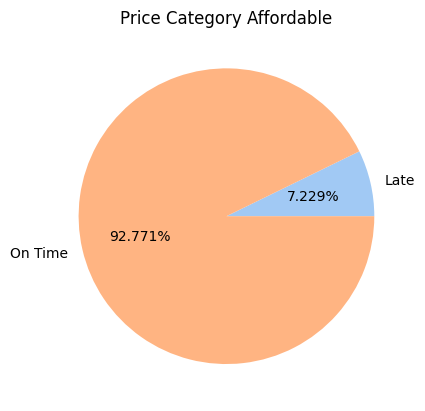

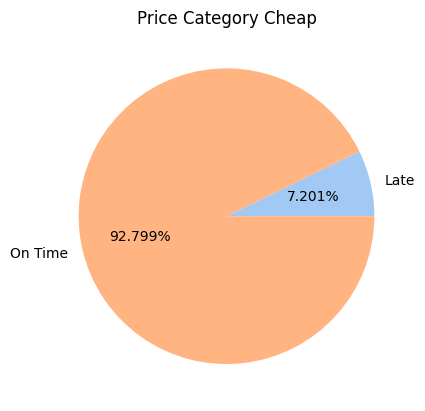

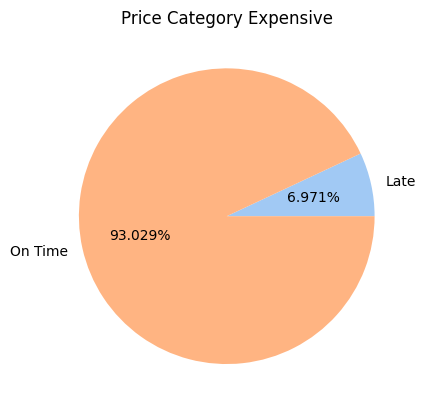

In [199]:
for i in range(0, len(price_late)):
    data = [price_late['late_counts'][i], price_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Price Category'+' '+price_late['price_category'][i].title())
    plt.show()

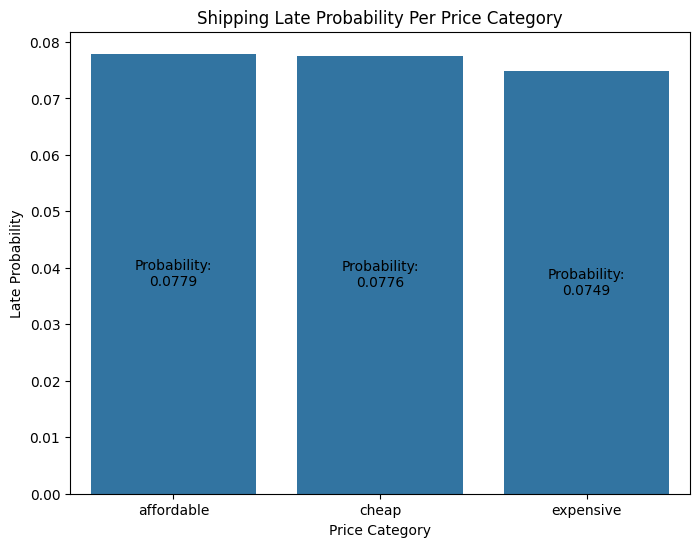

In [200]:
fig, ax = plt.subplots(figsize=(8, 6))

# add the plot
sns.barplot(x='price_category', y='late_prop', data=price_late, capsize=0.2, ax=ax, order=price_late.sort_values(by='late_prop', ascending=False).price_category).set(title='Shipping Late Probability Per Price Category')

# add the annotation
ax.bar_label(ax.containers[-1], fmt='Probability:\n%.4f', label_type='center')

ax.set(xlabel='Price Category')
ax.set(ylabel='Late Probability')
plt.show()

Based on the data, it is known that expensive goods tend to be the most at risk of late delivery, followed by cheap goods and moderate prices (affordable).

In [201]:
def priceLate(data):
    if(data in price_list):
        return price_late[price_late.price_category == data]['late_prop'].values[0]
    else:
        return 0

tr_data['price_late_prop'] = tr_data['price_category'].apply(priceLate)
tr_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_timestamp,order_estimated_delivery_date,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,is_late_s,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop,approved_min_purchase,apmpu_category,apmpu_late_prop,price_category,price_late_prop
0,Axfy13Hk4PIk,hCT0x9JiGXBQ,2017-10-22 18:57:54,2017-10-22 19:14:13,2017-10-26 22:19:52,2017-11-09,58125,varzea paulista,SP,90K0C1fIyQUf,ZWM05J9LcBSF,223.51,84.65,1,credit_card,1,259.14,toys,491.0,19.0,12.0,16.0,0,3648.0,medium,0.07457,6,6,0.075346,0.072117,18,19,0.080792,0.073792,0,fast,0.072185,affordable,0.077921
1,v6px92oS8cLG,PxA7fv9spyhx,2018-06-20 21:40:31,2018-06-20 22:20:20,2018-07-03 22:51:22,2018-07-24,3112,armacao dos buzios,RJ,qejhpMGGVcsl,IjlpYfhUbRQs,170.80,23.79,1,credit_card,8,382.39,watches_gifts,440.0,18.0,14.0,17.0,0,4284.0,medium,0.07457,2,2,0.074620,0.079129,21,22,0.086663,0.073651,0,fast,0.072185,affordable,0.077921
2,Ulpf9skrhjfm,g3nXeJkGI0Qw,2018-02-16 16:19:31,2018-02-17 16:15:35,2018-02-27 01:29:50,2018-03-08,4119,jandira,SP,qUS5d2pEAyxJ,77p2EYxcM9MD,64.40,17.38,1,credit_card,4,249.25,costruction_tools_garden,2200.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,16,16,0.078200,0.071649,23,slow,0.091217,affordable,0.077921
3,bwJVWupf2keN,EOEsCQ6QlpIg,2018-08-18 18:04:29,2018-08-18 18:15:16,2018-08-27 20:03:51,2018-09-19,18212,uberlandia,MG,639iGvMyv0De,jWzS0ayv9TGf,264.50,30.72,1,credit_card,2,27.79,toys,1450.0,68.0,3.0,48.0,0,9792.0,medium,0.07457,5,5,0.069131,0.072244,18,18,0.080792,0.083032,0,fast,0.072185,affordable,0.077921
4,Dd0QnrMk9Cj5,mVz5LO2Vd6cL,2017-12-22 16:44:04,2017-12-22 17:31:31,2018-01-05 19:22:49,2018-01-18,88868,ilhabela,SP,1lycYGcsic2F,l1pYW6GBnPMr,779.90,30.66,1,credit_card,1,76.15,toys,300.0,17.0,4.0,12.0,0,816.0,small,0.07616,4,4,0.076462,0.082739,16,17,0.078200,0.071161,0,fast,0.072185,expensive,0.074933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89311,zlcLnXGgAabl,bfJtzkBGksdY,2018-08-19 17:25:36,2018-08-21 04:35:30,2018-08-30 14:47:46,2018-09-04,94060,amparo,SP,W8vikEizUggJ,2QjevWskirjm,31.99,188.65,1,wallet,1,128.00,toys,700.0,21.0,14.0,14.0,0,4116.0,medium,0.07457,6,1,0.075346,0.077687,17,4,0.075763,0.070580,35,slow,0.091217,cheap,0.077597
89312,IlTAoIkILwrq,4hjsCpj6FC7g,2017-12-15 11:20:27,2017-12-16 02:37:32,2017-12-20 19:23:40,2018-01-04,99835,itapevi,SP,KXSbyJWtMMwZ,BFS9XJPapWv0,282.00,1.64,1,wallet,1,106.86,toys,600.0,16.0,16.0,16.0,0,4096.0,medium,0.07457,4,5,0.076462,0.072244,11,2,0.072013,0.085992,15,slow,0.091217,affordable,0.077921
89313,uA6oXfftGVmT,DLn56oKHl9bv,2018-07-24 06:39:14,2018-07-24 11:20:39,2018-07-27 01:41:40,2018-08-01,2540,sao paulo,SP,EG4wDSpFyTth,TuPm19CMKvrM,58.10,4.09,1,credit_card,1,376.39,health_beauty,250.0,22.0,10.0,18.0,0,3960.0,medium,0.07457,1,1,0.079510,0.077687,6,11,0.070815,0.075350,4,fast,0.072185,cheap,0.077597
89314,v3QtU6xlGDJp,auSfRYUQUOIq,2018-08-11 08:04:22,2018-08-11 08:24:40,2018-08-14 21:43:51,2018-08-17,12288,paulinia,SP,ZWyg4uNWPHjJ,yGbPyLPc8PmT,2899.00,113.01,1,voucher,1,48.05,toys,250.0,16.0,2.0,11.0,0,352.0,small,0.07616,5,5,0.069131,0.072244,8,8,0.076610,0.063984,0,fast,0.072185,expensive,0.074933


In [202]:
ts_data['price_category'] = ts_data['price'].apply(lambda x:'expensive' if x>=thirtil else ('affordable' if x>=sectil and x<thirtil else 'cheap'))
ts_data.head()

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop,approved_min_purchase,apmpu_category,apmpu_late_prop,price_category
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160,5,5,0.069131,0.072244,12,12,0.081045,0.080988,0,fast,0.072185,cheap
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160,5,5,0.069131,0.072244,17,20,0.075763,0.075046,2,fast,0.072185,cheap
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570,0,1,0.087031,0.077687,11,7,0.072013,0.081587,20,slow,0.091217,cheap
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013,4,4,0.076462,0.082739,10,10,0.068538,0.068203,0,fast,0.072185,affordable
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013,5,1,0.069131,0.077687,10,4,0.068538,0.070580,66,slow,0.091217,expensive


In [203]:
ts_data['price_late_prop'] = ts_data['price_category'].apply(priceLate)
ts_data

,order_id,customer_id,order_purchase_timestamp,order_approved_at,customer_zip_code_prefix,customer_city,customer_state,product_id,seller_id,price,shipping_charges,payment_sequential,payment_type,payment_installments,payment_value,product_category_name,product_weight_g,product_length_cm,product_height_cm,product_width_cm,prod_vol,vol_category,vol_late_prop,purchase_day_of_week,approved_day_of_week,pur_late_prop,app_late_prop,purchase_hour,approved_hour,purh_late_prop,apph_late_prop,approved_min_purchase,apmpu_category,apmpu_late_prop,price_category,price_late_prop
0,u6rPMRAYIGig,I74lXDOfoqsp,2017-11-18 12:29:57,2017-11-18 12:46:08,6020,goiania,GO,1slxdgbgWFax,3jwvL6ihC45G,24.10,20.90,1,credit_card,2,155.77,toys,50.0,16.0,5.0,11.0,880.0,small,0.076160,5,5,0.069131,0.072244,12,12,0.081045,0.080988,0,fast,0.072185,cheap,0.077597
1,ohY8f4FEbX19,47TuLHF2s7X5,2018-06-02 17:13:12,2018-06-02 20:12:23,23020,viamao,RS,77PgsiElQLeB,GlLj704QXlDB,42.89,12.28,1,credit_card,1,4.07,electronics,200.0,21.0,7.0,14.0,2058.0,small,0.076160,5,5,0.069131,0.072244,17,20,0.075763,0.075046,2,fast,0.072185,cheap,0.077597
2,I28liQek73i2,dQ0dqI8Qwlj8,2018-01-08 11:01:30,2018-01-09 07:24:03,75094,campinas,SP,QVlD26X1y7NI,V3iKL8r9W9NR,50.21,67.11,1,wallet,1,381.59,furniture_decor,1000.0,100.0,5.0,20.0,10000.0,medium,0.074570,0,1,0.087031,0.077687,11,7,0.072013,0.081587,20,slow,0.091217,cheap,0.077597
3,bBG1T89mlY8W,iQCmWhNkIczb,2017-03-10 10:24:46,2017-03-10 10:24:46,89284,santana de parnaiba,SP,yWlFGkKYfrpa,RNBdBKsXebna,89.10,62.05,1,credit_card,3,14.76,toys,8950.0,40.0,30.0,40.0,48000.0,large,0.083013,4,4,0.076462,0.082739,10,10,0.068538,0.068203,0,fast,0.072185,affordable,0.077921
4,CYxJJSQS8Lbo,Dp2g6JH8tO5Z,2017-12-02 10:04:07,2017-12-05 04:13:30,39810,aripuana,MT,h6MCbrwh5kiC,5Ja2lH0N2OZt,2139.99,9.41,1,wallet,1,284.09,toys,2301.0,32.0,35.0,34.0,38080.0,large,0.083013,5,1,0.069131,0.077687,10,4,0.068538,0.070580,66,slow,0.091217,expensive,0.074933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38274,QKBW3XKevmfn,Dw3aCTFf4Q4G,2018-08-24 11:54:56,2018-08-24 12:05:22,26160,guarulhos,SP,wr6barwyoaIE,XURInBuULfIO,99.25,37.66,1,credit_card,1,209.51,toys,200.0,16.0,28.0,11.0,4928.0,medium,0.074570,4,4,0.076462,0.082739,11,12,0.072013,0.080988,0,fast,0.072185,affordable,0.077921
38275,Tjiw9bj8HtLr,JmHJqJvpVcJs,2017-03-25 20:39:11,2017-03-25 20:50:17,39628,rio de janeiro,RJ,sPZVXBD9lf3e,wR4cqCClYDyY,86.32,40.98,1,credit_card,2,323.31,toys,5150.0,22.0,3.0,22.0,1452.0,small,0.076160,5,5,0.069131,0.072244,20,20,0.081226,0.075046,0,fast,0.072185,affordable,0.077921
38276,mCPofb7A1aTq,ro5DikwWCC3j,2018-08-16 13:39:30,2018-08-17 03:31:06,89284,santana de parnaiba,SP,Th6SHMsyTOMH,Gp2lLacVPwug,104.45,30.24,1,wallet,1,170.71,toys,430.0,21.0,11.0,17.0,3927.0,medium,0.074570,3,4,0.073942,0.082739,13,3,0.075863,0.091570,13,fast,0.072185,affordable,0.077921
38277,scVuqN10zbgb,R25nE2rl77AU,2018-06-27 13:17:05,2018-06-28 08:50:58,60867,sao paulo,SP,PyjlDSHRGdSt,al4fWZ5NFQzG,223.87,74.75,1,credit_card,10,100.65,toys,1850.0,24.0,36.0,23.0,19872.0,large,0.083013,2,3,0.074620,0.068938,13,8,0.075863,0.063984,19,slow,0.091217,affordable,0.077921


### Installments

<Axes: xlabel='payment_installments', ylabel='count'>

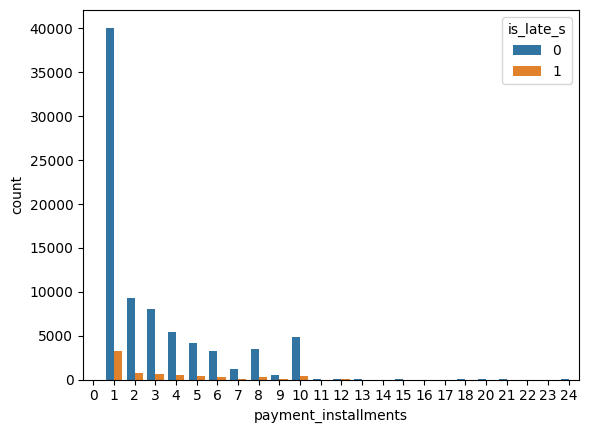

In [204]:
sns.countplot(x=tr_data['payment_installments'], hue=tr_data['is_late_s'])

In [205]:
install_late = tr_data[tr_data.is_late_s == 1]['payment_installments'].value_counts().rename_axis('payment_installments').reset_index(name='late_counts')
install_all = tr_data['payment_installments'].value_counts().rename_axis('payment_installments').reset_index(name='all_counts')
install_late['all_count'] = install_late.payment_installments.map(install_all.set_index('payment_installments')['all_counts'])
install_late['late_prop'] =install_late['late_counts'] / install_late['all_count']
install_list =install_late['payment_installments'].to_list()
install_late['install'] = install_late['payment_installments'].map({1: '1', 2: '2', 3: '3', 4:'4', 5:'5', 6:'6', 7:'7', 8:'8',9:'9',10:'10',11:'11',12:'12',13:'13',14:'14',15:'15',16:'16',17:'17',18:'18',19:'19',20:'20',21:'21',22:'22',23:'23',24:'24'})
install_late

,payment_installments,late_counts,all_count,late_prop,install
0,1,3274,43375,0.075481,1
1,2,797,10124,0.078724,2
2,3,677,8703,0.077789,3
3,4,484,5917,0.081798,4
4,10,380,5210,0.072937,10
5,5,366,4513,0.081099,5
6,8,304,3837,0.079229,8
7,6,267,3503,0.076220,6
8,7,107,1357,0.078850,7
9,9,56,547,0.102377,9


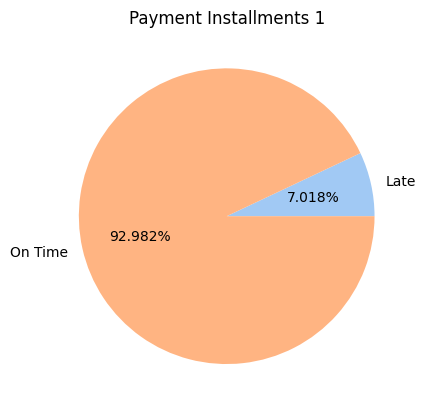

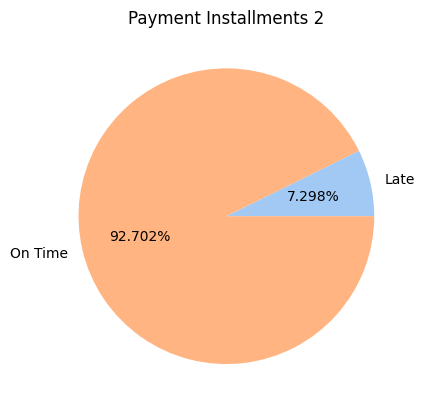

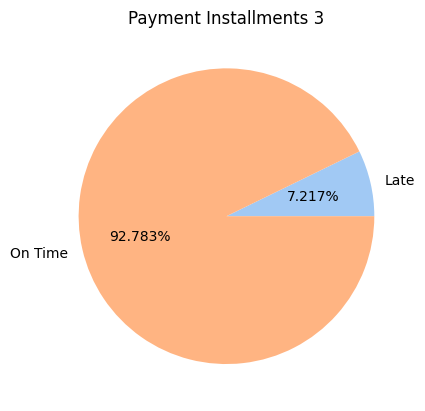

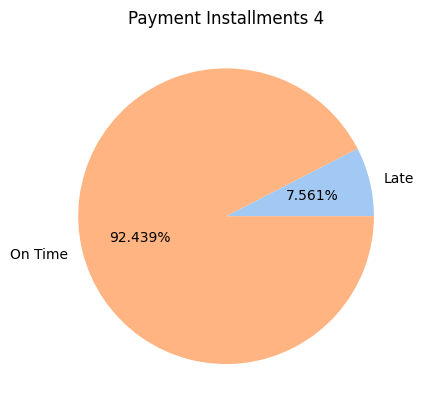

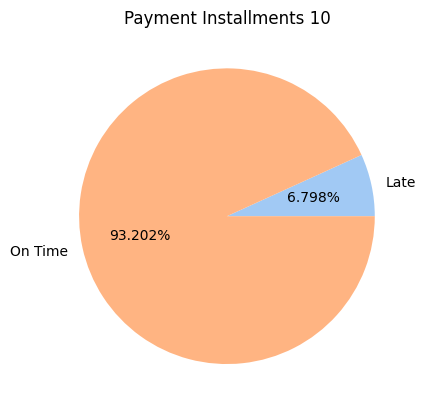

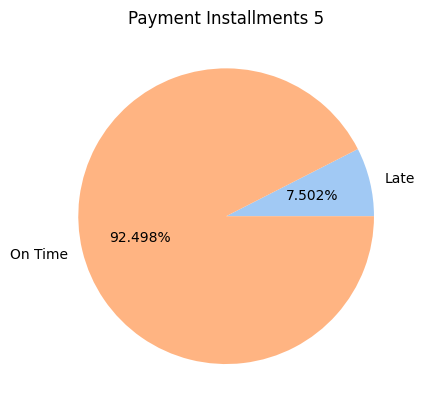

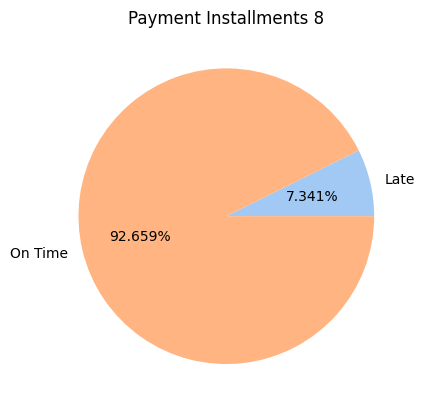

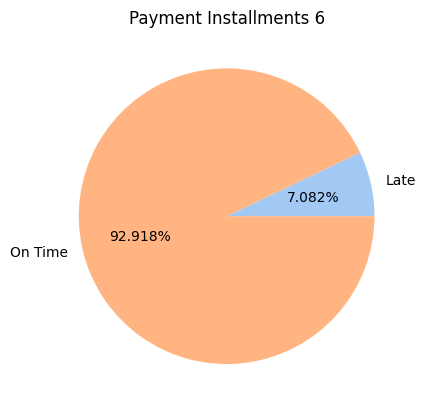

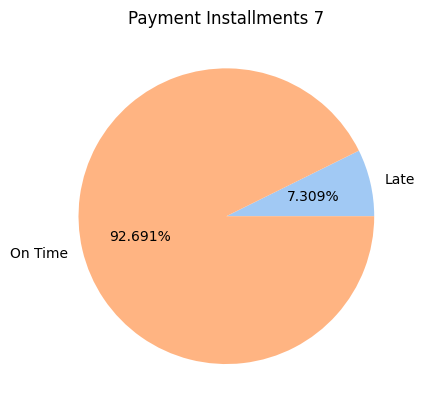

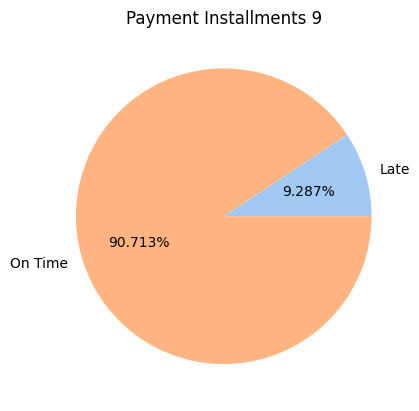

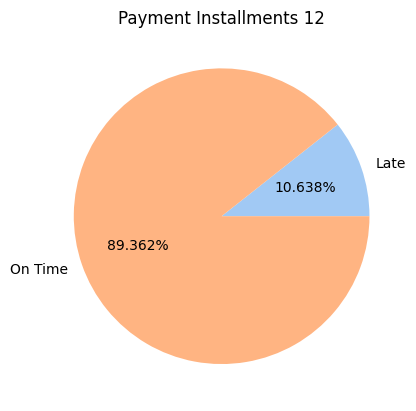

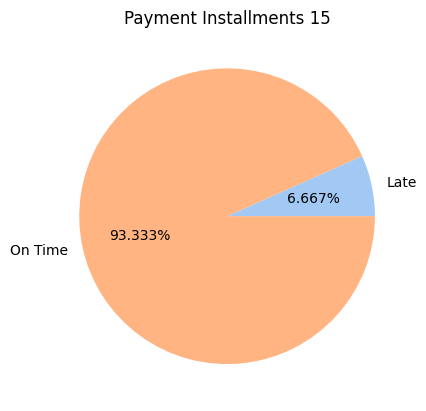

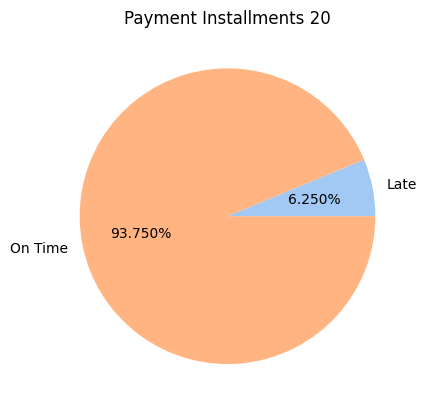

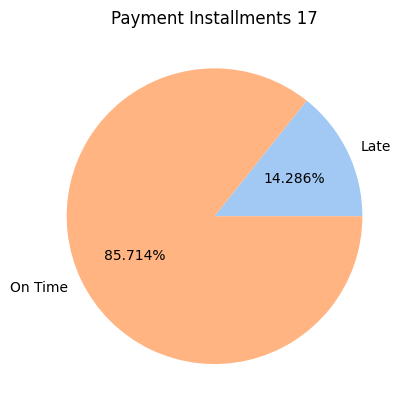

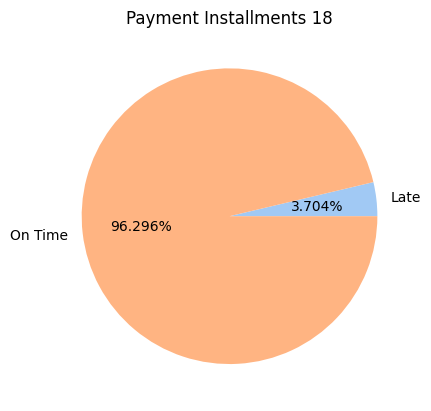

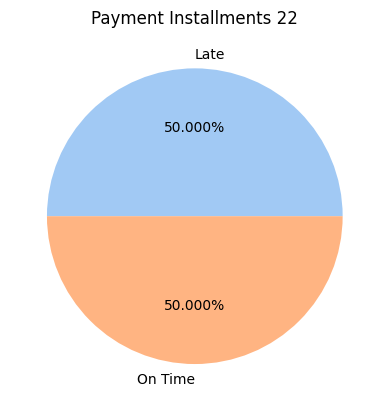

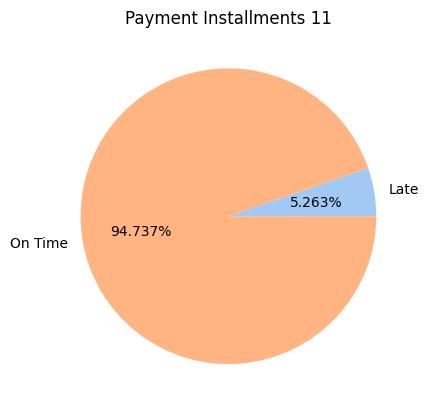

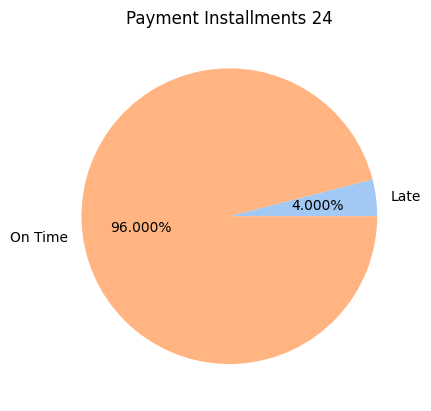

In [206]:
for i in range(0, len(install_late)):
    data = [install_late['late_counts'][i], install_late['all_count'][i]]
    labels = ['Late', 'On Time']
    #define Seaborn color palette to use
    colors = sns.color_palette('pastel')[0:5]
    #create pie chart
    plt.pie(data, labels = labels, colors = colors, autopct='%.3f%%')
    plt.title('Payment Installments'+' '+install_late['install'][i].title())
    plt.show()